In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import ast
import re
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib as mpl  

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 120) 

In [3]:
oncokb_dir = '/Users/ryanyutian/Desktop/Manuscript/oncokb_output/'

os.chdir(oncokb_dir)

temp_files = sorted([i for i in os.listdir(oncokb_dir) if 'DS' not in i])

In [4]:
temp_files

['GBM454_oncokb.txt',
 'GBM460_oncokb.txt',
 'GBM492_oncokb.txt',
 'GBM607_oncokb.txt',
 'GBM618_oncokb.txt',
 'GBM703_oncokb.txt',
 'GBM781_oncokb.txt',
 'GBM809_oncokb.txt',
 'GBM833_oncokb.txt',
 'GBM937_oncokb.txt',
 'SMTB123_oncokb.txt',
 'SMTB152_oncokb.txt',
 'SMTB265_oncokb.txt',
 'SMTB781_oncokb.txt']

In [5]:
clinical_cohort_dir = '/Users/ryanyutian/Desktop/Manuscript/cohort/202404_clinical_info.csv'

clinical_cohort_df = pd.read_csv(clinical_cohort_dir, sep=',', index_col=0)

clinical_cohort_df

,TissueID,OldSampleID,OldPairID,NewSampleID,NewPairID,LongRanger,TumourStage,Age,AgeCohort,Sex,TumourGrade,Pathology,Pathology_Detailed,TumourType,SurgeryDate,Dexamethasone_Decadron,OtherDrugs,Treatment,TMZ,RT,IDH12Status,CellLineAvailable,NucleiSeq,LRWGS,MatchedNormal,MatchedNormalID,MatchedNormalLongRangerDate,IDH1StatusFromLongRanger,IDH1_Other
1,GBM607,A_R_GBM607,A,A_R_GBM607,A,181113,Recurrence,25,Adult,Male,II,Oligoastrocytoma,Oligoatrocytoma,LGG,201211,Yes,None,None,No,No,IDH1_R132H,Yes,Yes,Yes,Yes,G809,200504.0,R132H,V178I_in_normal_and_tumour
2,GBM809r,A_RR_GBM809,A,A_RR_GBM809,A,181113,SecondRecurrence,28,Adult,Male,IV,Glioblastoma,Glioblastoma,GBM,201510,Yes,PCV,TMZ+RT,Yes,Yes,IDH1_R132H,Yes,Yes,Yes,Yes,G809,200504.0,R132H,V178I_in_normal_and_tumour
3,GBM593,B_P_GBM593,B,B_P_GBM593,B,181113,Primary,30,Adult,Female,II,Oligoastrocytoma,Oligoatrocytoma,LGG,201208,No,None,None,No,No,N.D.,No,Yes,Yes,No,NaN,NaN,R132S,NaN
4,GBM898r,B_R_GBM898,B,B_R_GBM898,B,181113,Recurrence,35,Adult,Female,II,Astrocytoma,Diffuse_Astrocytoma,LGG,201702,No,None,TMZ+RT,No,No,N.D.,No,Yes,Yes,No,NaN,NaN,R132S,NaN
5,GBM781,E_R_GBM781,E,C_R_GBM781,C,200623,Recurrence,37,Adult,Male,II,Oligodendroglioma,Oligodendroglioma,LGG,201404,Yes,Keppra,None,No,No,N.D.,No,No,Yes,Yes,SMTB211,200504.0,R132H,NaN
6,GBM937,E_RR_GBM937,E,C_RR_GBM937,C,210312,SecondRecurrence,39,Adult,Male,III,Oligodendroglioma,Oligodendroglioma,LGG,201708,Yes,None,TMZ+RT,Yes,Yes,N.D.,No,No,Yes,Yes,SMTB211,200504.0,R132H,NaN
7,GBM620,F_P_GBM620,F,D_P_GBM620,D,191212,Primary,55,Adult,Male,IV,Glioblastoma,Glioblastoma,GBM,201212,N.D.,N.D.,None,No,No,IDH1_R100Q,Yes,Yes,Yes,No,NaN,NaN,R100Q,NaN
8,GBM691r,F_R_GBM691,F,D_R_GBM691,D,190129,Recurrence,56,Adult,Male,IV,Glioblastoma,Glioblastoma,GBM,201311,N.D.,N.D.,TMZ+RT,Yes,Yes,IDH1_R100Q,Yes,Yes,Yes,No,NaN,NaN,R100Q,NaN
9,GBM454,G_P_GBM454,G,E_P_GBM454,E,181113,Primary,4,Pediatric,Female,I,Astrocytoma,Pilocytic_Astrocytoma,LGG,201007,N.D.,N.D.,None,No,No,N.D.,No,Yes,Yes,Yes,BT_2009038,220217.0,WT,NaN
10,GBM833r,G_R_GBM833,G,E_R_GBM833,E,181113,Recurrence,9,Pediatric,Female,I,Astrocytoma,Pilocytic_Astrocytoma,LGG,201602,N.D.,N.D.,TMZ+RT,Yes,Yes,N.D.,No,Yes,Yes,Yes,BT_2009038,220217.0,WT,NaN


In [6]:
sample_list = clinical_cohort_df['NewSampleID'].tolist()

short_sampleID_list = [file.split('_')[0] for file in temp_files]

short_to_long_sampleID = {s.split('_')[-1]: s for s in sample_list}

matches = {short: short_to_long_sampleID.get(short, None) for short in short_sampleID_list}

In [7]:
matches

{'GBM454': 'E_P_GBM454',
 'GBM460': 'F_P_GBM460',
 'GBM492': 'F_R_GBM492',
 'GBM607': 'A_R_GBM607',
 'GBM618': 'X_P_GBM618',
 'GBM703': 'J_P_GBM703',
 'GBM781': 'C_R_GBM781',
 'GBM809': 'A_RR_GBM809',
 'GBM833': 'E_R_GBM833',
 'GBM937': 'C_RR_GBM937',
 'SMTB123': 'X_P_SMTB123',
 'SMTB152': None,
 'SMTB265': None,
 'SMTB781': 'J_R_SMTB781'}

In [8]:
oncokb_annotated_dfs = {}

for file in temp_files:
    
    if matches[file.split('_')[0]]:
        
        temp_output_df_name = matches[file.split('_')[0]]
        oncokb_annotated_dfs[temp_output_df_name] = pd.read_csv(oncokb_dir + file, sep='\t', low_memory=False)

In [9]:
oncokb_annotated_dfs = {k: oncokb_annotated_dfs[k][oncokb_annotated_dfs[k]['t_depth']>=15] for k in sorted(oncokb_annotated_dfs)}

list(oncokb_annotated_dfs.keys())

['A_RR_GBM809',
 'A_R_GBM607',
 'C_RR_GBM937',
 'C_R_GBM781',
 'E_P_GBM454',
 'E_R_GBM833',
 'F_P_GBM460',
 'F_R_GBM492',
 'J_P_GBM703',
 'J_R_SMTB781',
 'X_P_GBM618',
 'X_P_SMTB123']

In [10]:
oncokb_annotated_dfs['A_R_GBM607']

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,t_depth,t_ref_count,t_alt_count,n_depth,n_ref_count,n_alt_count,all_effects,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,ALLELE_NUM,DISTANCE,STRAND_VEP,SYMBOL,SYMBOL_SOURCE,HGNC_ID,BIOTYPE,CANONICAL,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,RefSeq,SIFT,PolyPhen,EXON,INTRON,DOMAINS,AF,AFR_AF,AMR_AF,ASN_AF,EAS_AF,EUR_AF,SAS_AF,AA_AF,EA_AF,CLIN_SIG,SOMATIC,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,IMPACT,PICK,VARIANT_CLASS,TSL,HGVS_OFFSET,PHENO,MINIMISED,ExAC_AF,ExAC_AF_AFR,ExAC_AF_AMR,ExAC_AF_EAS,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO,FILTER,flanking_bps,vcf_id,vcf_qual,ExAC_AF_Adj,ExAC_AC_AN_Adj,ExAC_AC_AN,ExAC_AC_AN_AFR,ExAC_AC_AN_AMR,ExAC_AC_AN_EAS,ExAC_AC_AN_FIN,ExAC_AC_AN_NFE,ExAC_AC_AN_OTH,ExAC_AC_AN_SAS,ExAC_FILTER,gnomAD_AF,gnomAD_AFR_AF,gnomAD_AMR_AF,gnomAD_ASJ_AF,gnomAD_EAS_AF,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,vcf_pos,ANNOTATED,GENE_IN_ONCOKB,VARIANT_IN_ONCOKB,MUTATION_EFFECT,MUTATION_EFFECT_CITATIONS,ONCOGENIC,LEVEL_1,LEVEL_2,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,LEVEL_R2,HIGHEST_LEVEL,HIGHEST_SENSITIVE_LEVEL,HIGHEST_RESISTANCE_LEVEL,TX_CITATIONS,LEVEL_Dx1,LEVEL_Dx2,LEVEL_Dx3,HIGHEST_DX_LEVEL,DX_CITATIONS,LEVEL_Px1,LEVEL_Px2,LEVEL_Px3,HIGHEST_PX_LEVEL,PX_CITATIONS
0,NADK,65220,.,GRCh38,chr1,1750192,1750193,+,3'Flank,INS,-,-,CC,novel,NaN,GNLR2_0001_Bn_U_GBM607,GNLR2_0001_Ly_R_G809,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000378625,NaN,90,86,4,13,13,0,"NADK,downstream_gene_variant,,ENST00000341426,...",CC,ENSG00000008130,ENST00000378625,Transcript,downstream_gene_variant,NaN,NaN,NaN,NaN,NaN,NaN,1,1039.0,-1.0,NADK,HGNC,HGNC:29831,protein_coding,YES,CCDS55562.1,ENSP00000367890,O95544,NaN,UPI000013CBEB,NM_001198994.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODIFIER,1.0,insertion,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strand_bias;weak_evidence,CAC,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750192,True,True,False,Unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NADK,65220,.,GRCh38,chr1,1750508,1750508,+,3'Flank,SNP,A,A,C,rs422370,NaN,GNLR2_0001_Bn_U_GBM607,GNLR2_0001_Ly_R_G809,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000378625,NaN,43,35,8,8,8,0,"NADK,downstream_gene_variant,,ENST00000341426,...",C,ENSG00000008130,ENST00000378625,Transcript,downstream_gene_variant,NaN,NaN,NaN,NaN,NaN,rs422370,1,724.0,-1.0,NADK,HGNC,HGNC:29831,protein_coding,YES,CCDS55562.1,ENSP00000367890,O95544,NaN,UPI000013CBEB,NM_001198994.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODIFIER,1.0,SNV,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASS,GAC,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750508,True,True,False,Unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NADK,65220,.,GRCh38,chr1,1750589,1750589,+,3'Flank,SNP,G,G,A,rs868553297,NaN,GNLR2_0001_Bn_U_GBM607,GNLR2_0001_Ly_R_G809,G,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000378625,NaN,31,28,3,10,10,0,"NADK,downstream_gene_variant,,E

In [11]:
oncogenic_level_of_interest = ['Oncogenic', 'Likely Oncogenic', 'Resistance']

In [12]:
oncokb_oncogenic_dfs = {}

for df_name in oncokb_annotated_dfs:
    
    temp_df = oncokb_annotated_dfs[df_name]
    
    oncokb_oncogenic_dfs[df_name] = temp_df[temp_df['ONCOGENIC'].isin(oncogenic_level_of_interest)]

In [13]:
oncokb_oncogenic_dfs_w_vaf = {}

for df_name in oncokb_oncogenic_dfs:
    
    temp_vaf_col = []
    
    temp_df = oncokb_oncogenic_dfs[df_name]
    
    for _, row in temp_df.iterrows():
        
        temp_vaf_col.append(row['t_alt_count']/row['t_depth'])
        
    temp_new_df = temp_df.copy()
    temp_new_df['VAF'] = temp_vaf_col
    
    oncokb_oncogenic_dfs_w_vaf[df_name] = temp_new_df.copy()

In [14]:
oncokb_oncogenic_dfs_filtered = {}

for df_name in oncokb_oncogenic_dfs_w_vaf:
    
    temp_df = oncokb_oncogenic_dfs_w_vaf[df_name]
    
    temp_filtered_df = pd.DataFrame(columns=temp_df.columns)
    
    for _, row in temp_df.iterrows():
        
        if row['Variant_Type'] == 'INS' or row['Variant_Type'] == 'DEL':
            
            if row['VAF'] >= 0.2:
                
                temp_filtered_df = temp_filtered_df.append(row, ignore_index=True)
                
        else:
            
            if row['VAF'] >= 0.1:
                
                temp_filtered_df = temp_filtered_df.append(row, ignore_index=True)

    temp_filtered_df = temp_filtered_df.reset_index(drop=True)
    
    oncokb_oncogenic_dfs_filtered[df_name] = temp_filtered_df.copy()

In [15]:
oncokb_oncogenic_dfs_filtered['A_RR_GBM809']

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,t_depth,t_ref_count,t_alt_count,n_depth,n_ref_count,n_alt_count,all_effects,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,ALLELE_NUM,DISTANCE,STRAND_VEP,SYMBOL,SYMBOL_SOURCE,HGNC_ID,BIOTYPE,CANONICAL,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,RefSeq,SIFT,PolyPhen,EXON,INTRON,DOMAINS,AF,AFR_AF,AMR_AF,ASN_AF,EAS_AF,EUR_AF,SAS_AF,AA_AF,EA_AF,CLIN_SIG,SOMATIC,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,IMPACT,PICK,VARIANT_CLASS,TSL,HGVS_OFFSET,PHENO,MINIMISED,ExAC_AF,ExAC_AF_AFR,ExAC_AF_AMR,ExAC_AF_EAS,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO,FILTER,flanking_bps,vcf_id,vcf_qual,ExAC_AF_Adj,ExAC_AC_AN_Adj,ExAC_AC_AN,ExAC_AC_AN_AFR,ExAC_AC_AN_AMR,ExAC_AC_AN_EAS,ExAC_AC_AN_FIN,ExAC_AC_AN_NFE,ExAC_AC_AN_OTH,ExAC_AC_AN_SAS,ExAC_FILTER,gnomAD_AF,gnomAD_AFR_AF,gnomAD_AMR_AF,gnomAD_ASJ_AF,gnomAD_EAS_AF,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,vcf_pos,ANNOTATED,GENE_IN_ONCOKB,VARIANT_IN_ONCOKB,MUTATION_EFFECT,MUTATION_EFFECT_CITATIONS,ONCOGENIC,LEVEL_1,LEVEL_2,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,LEVEL_R2,HIGHEST_LEVEL,HIGHEST_SENSITIVE_LEVEL,HIGHEST_RESISTANCE_LEVEL,TX_CITATIONS,LEVEL_Dx1,LEVEL_Dx2,LEVEL_Dx3,HIGHEST_DX_LEVEL,DX_CITATIONS,LEVEL_Px1,LEVEL_Px2,LEVEL_Px3,HIGHEST_PX_LEVEL,PX_CITATIONS,VAF
0,IDH1,3417,.,GRCh38,chr2,208248388,208248388,+,Missense_Mutation,SNP,C,C,T,rs121913500,NaN,GNLR2_0001_Bn_U_GBM809,GNLR2_0001_Ly_R_G809,C,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c.395G>A,p.Arg132His,p.R132H,ENST00000415913,4/10,54,31,23,23,23,0,"IDH1,missense_variant,p.Arg132His,ENST00000415...",T,ENSG00000138413,ENST00000415913,Transcript,missense_variant,777/2441,395/1245,132/414,R/H,cGt/cAt,"rs121913500,CM1310533,COSM28750,COSM28746",1,NaN,-1.0,IDH1,HGNC,HGNC:5382,protein_coding,YES,CCDS2381.1,ENSP00000390265,O75874,V9HWJ2,UPI000012D1B4,NM_001282387.1,deleterious_low_confidence(0.01),benign(0.047),4/10,NaN,"PDB-ENSP_mappings:1t09.A,PDB-ENSP_mappings:1t0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"not_provided,likely_pathogenic,pathogenic","0,0,1,1","18772396,21446021,25043048",NaN,NaN,NaN,NaN,MODERATE,1.0,SNV,1.0,NaN,"1,1,1,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,PASS,ACG,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208248388,True,True,True,Switch-of-function,23393090;22763442;29670690;19935646;29860938,Oncogenic,NaN,NaN,Ivosidenib,Vorasidenib,NaN,NaN,NaN,LEVEL_3A,LEVEL_3A,NaN,29670690;32530764;37272516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425926
1,PTCH1,5727,.,GRCh38,chr9,95508247,95508248,+,Frame_Shift_Ins,INS,-,-,C,rs778175153,NaN,GNLR2_0001_Bn_U_GBM809,GNLR2_0001_Ly_R_G809,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c.114dup,p.Leu39AlafsTer51,p.L39Afs*51,ENST00000331920,1/24,83,58,18,24,19,4,"PTCH1,frameshift_variant,p.Leu39AlafsTer51,ENS...",C,ENSG00000185920,ENST00000331920,Transcript,frameshift_variant,414-415/8057,114-115/4344,38-39/1447,-/X,-/G,rs778175153,1,NaN,-1.0,PTCH1,HGNC,HGNC:9585,protein_coding,YES,CCDS6714.1,ENSP00000332353,Q13635,NaN,UPI00001AFF9C,NM_000264.3,NaN,NaN,1/24,NaN,"hmmpanther:PTHR10796,hmmpanther:PTHR10796:SF61...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,1.0,insertion,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,germline;multiallelic;normal_artifact

In [16]:
filtered_mutated_gene_count_dict = {}

for df_name in oncokb_oncogenic_dfs_filtered:
    
    temp_df = oncokb_oncogenic_dfs_filtered[df_name]
    
    temp_gene_list = temp_df['Hugo_Symbol'].unique().tolist()
    
    for gene in temp_gene_list:
        
        if gene in filtered_mutated_gene_count_dict:
            
            filtered_mutated_gene_count_dict[gene] += 1
            
        else:
            
            filtered_mutated_gene_count_dict[gene] = 1

In [17]:
sorted_filtered_mutated_gene_count_dict = {k:v for k,v in \
                                           sorted(filtered_mutated_gene_count_dict.items(), key=lambda item:item[1], reverse=True)}

In [18]:
sorted_filtered_mutated_gene_count_dict

{'TP53': 6,
 'IDH1': 5,
 'ATRX': 5,
 'CREBBP': 4,
 'ARID5B': 4,
 'ZFHX3': 3,
 'HLA-B': 3,
 'PMS2': 3,
 'EP400': 2,
 'PBRM1': 2,
 'ARID1A': 2,
 'LRP5': 2,
 'ELMSAN1': 2,
 'EZH2': 2,
 'RAD21': 2,
 'BCORL1': 2,
 'TERT': 2,
 'PTCH1': 1,
 'ATXN2': 1,
 'SMARCA4': 1,
 'XRCC1': 1,
 'NOTCH2': 1,
 'ROBO1': 1,
 'BLM': 1,
 'FOXL2': 1,
 'RECQL': 1,
 'BRIP1': 1,
 'SH2D1A': 1,
 'CBFA2T3': 1,
 'SOX9': 1,
 'KDM5C': 1,
 'EGR1': 1,
 'HLA-A': 1,
 'COL2A1': 1,
 'KMT2D': 1,
 'HNF1A': 1,
 'RB1': 1,
 'PML': 1,
 'TSC2': 1,
 'NF1': 1,
 'RNF43': 1,
 'TGFBR2': 1,
 'ESCO2': 1,
 'PTPN13': 1,
 'FAT1': 1,
 'CUX1': 1,
 'SUFU': 1,
 'MEN1': 1,
 'ALDH2': 1,
 'PALB2': 1,
 'ARID3A': 1,
 'BRSK1': 1,
 'ASXL1': 1,
 'ZNRF3': 1,
 'ZMYM3': 1,
 'SDHB': 1,
 'SETD2': 1,
 'PIK3R1': 1,
 'HLA-C': 1,
 'TP53BP1': 1,
 'CDK12': 1}

# SV overlap analysis

In [19]:
new_sample_list = \
['A_R_GBM607',
 'A_RR_GBM809',
 'C_R_GBM781',
 'C_RR_GBM937',
 'E_P_GBM454',
 'E_R_GBM833',
 'F_P_GBM460',
 'F_R_GBM492',
 'J_P_GBM703',
 'J_R_SMTB781',
 'X_P_GBM618',
 'X_P_SMTB123']

In [20]:
glioma_driver_DEL_count_df = pd.read_csv('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/DEL_heatmap.csv', index_col=0)
glioma_driver_DUP_count_df = pd.read_csv('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/DUP_heatmap.csv', index_col=0)
glioma_driver_INV_count_df = pd.read_csv('/Users/ryanyutian/Desktop/Manuscript/driver_heatmap/INV_heatmap.csv', index_col=0)

In [21]:
matched_SNV_SV_dict = {'sample_id': [], 'gene_symbol': [], 'HGVSc': [], 'Variant_Classification': [], 'SV_type': []}

for s_id in new_sample_list:
    
    ### Deletions ###
    temp_DEL_index_list = glioma_driver_DEL_count_df.index.tolist()
    
    for gene in temp_DEL_index_list:
        
        if glioma_driver_DEL_count_df.loc[gene, s_id] != 0:
            
            temp_oncokb_oncogenic_df = oncokb_oncogenic_dfs_filtered[s_id]
            
            temp_gene_match_df = temp_oncokb_oncogenic_df[temp_oncokb_oncogenic_df['Hugo_Symbol']==gene]

            if len(temp_gene_match_df) != 0:
                
                for _, row in temp_gene_match_df.iterrows():
                    
                    matched_SNV_SV_dict['sample_id'].append(s_id)
                    matched_SNV_SV_dict['gene_symbol'].append(row['Hugo_Symbol'])
                    matched_SNV_SV_dict['HGVSc'].append(row['HGVSc'])
                    matched_SNV_SV_dict['Variant_Classification'].append(row['Variant_Classification'])
                    matched_SNV_SV_dict['SV_type'].append('DEL')
                    
    ### Duplication ###
    temp_DUP_index_list = glioma_driver_DUP_count_df.index.tolist()
    
    for gene in temp_DUP_index_list:
        
        if glioma_driver_DUP_count_df.loc[gene, s_id] != 0:
            
            temp_oncokb_oncogenic_df = oncokb_oncogenic_dfs_filtered[s_id]
            
            temp_gene_match_df = temp_oncokb_oncogenic_df[temp_oncokb_oncogenic_df['Hugo_Symbol']==gene]

            if len(temp_gene_match_df) != 0:
                
                for _, row in temp_gene_match_df.iterrows():
                    
                    matched_SNV_SV_dict['sample_id'].append(s_id)
                    matched_SNV_SV_dict['gene_symbol'].append(row['Hugo_Symbol'])
                    matched_SNV_SV_dict['HGVSc'].append(row['HGVSc'])
                    matched_SNV_SV_dict['Variant_Classification'].append(row['Variant_Classification'])
                    matched_SNV_SV_dict['SV_type'].append('DUP')
                    
    ### Inversion ###
    temp_INV_index_list = glioma_driver_INV_count_df.index.tolist()
    
    for gene in temp_INV_index_list:
        
        if glioma_driver_INV_count_df.loc[gene, s_id] != 0:
            
            temp_oncokb_oncogenic_df = oncokb_oncogenic_dfs_filtered[s_id]
            
            temp_gene_match_df = temp_oncokb_oncogenic_df[temp_oncokb_oncogenic_df['Hugo_Symbol']==gene]

            if len(temp_gene_match_df) != 0:
                
                for _, row in temp_gene_match_df.iterrows():
                    
                    matched_SNV_SV_dict['sample_id'].append(s_id)
                    matched_SNV_SV_dict['gene_symbol'].append(row['Hugo_Symbol'])
                    matched_SNV_SV_dict['HGVSc'].append(row['HGVSc'])
                    matched_SNV_SV_dict['Variant_Classification'].append(row['Variant_Classification'])
                    matched_SNV_SV_dict['SV_type'].append('INV')


In [22]:
matched_SNV_SV_dict

{'sample_id': [],
 'gene_symbol': [],
 'HGVSc': [],
 'Variant_Classification': [],
 'SV_type': []}

In [23]:
shared_SV_type_dict = {}

for gene in sorted_filtered_mutated_gene_count_dict:
    
    temp_sv_type_list = []
    
    ### Deletions ###
    if gene in glioma_driver_DEL_count_df.index.tolist():
        
        temp_total_DEL_count = glioma_driver_DEL_count_df.loc[gene, ].sum()
    
        if temp_total_DEL_count != 0:
            
            temp_sv_type_list.append('DEL')
            
    ### Duplications ###
    if gene in glioma_driver_DUP_count_df.index.tolist():
        
        temp_total_DUP_count = glioma_driver_DUP_count_df.loc[gene, ].sum()
    
        if temp_total_DUP_count != 0:
            
            temp_sv_type_list.append('DUP')
            
    ### Inversions ###
    if gene in glioma_driver_INV_count_df.index.tolist():
        
        temp_total_INV_count = glioma_driver_INV_count_df.loc[gene, ].sum()
    
        if temp_total_INV_count != 0:
            
            temp_sv_type_list.append('INV')

    if len(temp_sv_type_list) != 0:
        
        shared_SV_type_dict[gene] = temp_sv_type_list

In [24]:
shared_SV_type_dict

{'TP53': ['DEL'],
 'IDH1': ['DUP'],
 'ATRX': ['DUP'],
 'CREBBP': ['DEL', 'DUP'],
 'ZFHX3': ['DEL'],
 'ARID1A': ['DEL'],
 'EZH2': ['DUP'],
 'TERT': ['DEL'],
 'SMARCA4': ['DEL', 'DUP'],
 'KDM5C': ['DUP'],
 'RB1': ['DEL', 'DUP'],
 'NF1': ['DEL'],
 'FAT1': ['DEL', 'DUP'],
 'CUX1': ['DUP'],
 'SETD2': ['DEL']}

In [25]:
shared_SV_count_dict = {}
shared_SV_selected_count_dict = {}

for gene in shared_SV_type_dict:
    
    temp_count = 0
    temp_selected_count = 0
    
    for sv_type in shared_SV_type_dict[gene]:
        
        if sv_type == 'DEL':
            
            temp_count += glioma_driver_DEL_count_df.loc[gene, ].sum()
            temp_selected_count += glioma_driver_DEL_count_df.loc[gene, new_sample_list].sum()

        elif sv_type == 'DUP':
            
            temp_count += glioma_driver_DUP_count_df.loc[gene, ].sum()
            temp_selected_count += glioma_driver_DUP_count_df.loc[gene, new_sample_list].sum()
            
    shared_SV_count_dict[gene] = temp_count
    shared_SV_selected_count_dict[gene] = temp_selected_count

In [26]:
sorted_shared_SV_count_dict = {k:v for k,v in sorted(shared_SV_count_dict.items(), key=lambda item:item[1], reverse=True)}

sorted_shared_SV_selected_count_dict = {k:v for k,v in sorted(shared_SV_selected_count_dict.items(), key=lambda item:item[1], reverse=True)}

In [27]:
sorted_shared_SV_count_dict

{'EZH2': 10,
 'CUX1': 8,
 'RB1': 4,
 'SMARCA4': 3,
 'NF1': 3,
 'ATRX': 2,
 'CREBBP': 2,
 'TERT': 2,
 'KDM5C': 2,
 'FAT1': 2,
 'TP53': 1,
 'IDH1': 1,
 'ZFHX3': 1,
 'ARID1A': 1,
 'SETD2': 1}

In [28]:
sorted_shared_SV_selected_count_dict

{'IDH1': 1,
 'ZFHX3': 1,
 'EZH2': 1,
 'FAT1': 1,
 'CUX1': 1,
 'SETD2': 1,
 'TP53': 0,
 'ATRX': 0,
 'CREBBP': 0,
 'ARID1A': 0,
 'TERT': 0,
 'SMARCA4': 0,
 'KDM5C': 0,
 'RB1': 0,
 'NF1': 0}

In [29]:
graph_order_w_sv = []

for value in sorted(np.unique(list(sorted_shared_SV_selected_count_dict.values())), reverse=True):
    
    gene_w_value = [k for k,v in sorted_shared_SV_selected_count_dict.items() if v == value]

    temp_dict = {k:v for k,v in sorted_shared_SV_count_dict.items() if k in gene_w_value}

    sorted_temp_dict = {k:v for k,v in sorted(temp_dict.items(), key=lambda item:item[1], reverse=True)}
    
    graph_order_w_sv.extend(list(sorted_temp_dict.keys()))

In [30]:
graph_order_w_sv

['EZH2',
 'CUX1',
 'FAT1',
 'IDH1',
 'ZFHX3',
 'SETD2',
 'RB1',
 'SMARCA4',
 'NF1',
 'ATRX',
 'CREBBP',
 'TERT',
 'KDM5C',
 'TP53',
 'ARID1A']

In [31]:
graph_order_wo_sv = [gene for gene, v in sorted_filtered_mutated_gene_count_dict.items() if gene not in graph_order_w_sv]

In [32]:
graph_order_wo_sv

['ARID5B',
 'HLA-B',
 'PMS2',
 'EP400',
 'PBRM1',
 'LRP5',
 'ELMSAN1',
 'RAD21',
 'BCORL1',
 'PTCH1',
 'ATXN2',
 'XRCC1',
 'NOTCH2',
 'ROBO1',
 'BLM',
 'FOXL2',
 'RECQL',
 'BRIP1',
 'SH2D1A',
 'CBFA2T3',
 'SOX9',
 'EGR1',
 'HLA-A',
 'COL2A1',
 'KMT2D',
 'HNF1A',
 'PML',
 'TSC2',
 'RNF43',
 'TGFBR2',
 'ESCO2',
 'PTPN13',
 'SUFU',
 'MEN1',
 'ALDH2',
 'PALB2',
 'ARID3A',
 'BRSK1',
 'ASXL1',
 'ZNRF3',
 'ZMYM3',
 'SDHB',
 'PIK3R1',
 'HLA-C',
 'TP53BP1',
 'CDK12']

# Plot 1

In [33]:
def generate_heatmap_df(DEL_heatmap_df, DUP_heatmap_df, INV_heatmap_df, sample_list, gene_list, oncogenic_df_dict):
    
    SV_output_df = pd.DataFrame(index=gene_list, columns=sample_list)
    SNV_output_df = pd.DataFrame(index=gene_list, columns=sample_list)
    
    for gene in gene_list:
        
        for sample in sample_list:
            
            # Initialize cells with empty lists if not already initialized
            if pd.isna(SV_output_df.loc[gene, sample]):
                
                SV_output_df.loc[gene, sample] = []
                
            if pd.isna(SNV_output_df.loc[gene, sample]):
                
                SNV_output_df.loc[gene, sample] = []
            
            ### SV OUTPUT ###
            
            if gene in list(DEL_heatmap_df.index):

                if DEL_heatmap_df.loc[gene, sample] != 0:

                    SV_output_df.loc[gene, sample].append('DEL')

                if DUP_heatmap_df.loc[gene, sample] != 0:

                    SV_output_df.loc[gene, sample].append('DUP')

                if INV_heatmap_df.loc[gene, sample] != 0:

                    SV_output_df.loc[gene, sample].append('INV')
                
            ### SNV OUTPUT ###
            temp_oncogenic_df = oncogenic_df_dict[sample]
            
            temp_oncogenic_gene_df = temp_oncogenic_df[temp_oncogenic_df['Hugo_Symbol']==gene]
            
            if len(temp_oncogenic_gene_df) != 0:
                
                SNV_output_df.loc[gene, sample] = temp_oncogenic_gene_df['Variant_Classification'].unique().tolist()
                                
    return SV_output_df, SNV_output_df

In [34]:
SV_pre_plot_df1, SNV_pre_plot_df1 = \
generate_heatmap_df(glioma_driver_DEL_count_df, glioma_driver_DUP_count_df, glioma_driver_INV_count_df, \
                    new_sample_list, graph_order_w_sv, oncokb_oncogenic_dfs_filtered)

In [35]:
SV_pre_plot_df1

,A_R_GBM607,A_RR_GBM809,C_R_GBM781,C_RR_GBM937,E_P_GBM454,E_R_GBM833,F_P_GBM460,F_R_GBM492,J_P_GBM703,J_R_SMTB781,X_P_GBM618,X_P_SMTB123
EZH2,[],[],[],[],[],[],[],[],[],[],[],[DUP]
CUX1,[],[],[],[],[],[DUP],[],[],[],[],[],[]
FAT1,[],[],[],[DEL],[],[],[],[],[],[],[],[]
IDH1,[],[],[],[],[],[],[DUP],[],[],[],[],[]
ZFHX3,[],[],[],[],[],[],[DEL],[],[],[],[],[]
SETD2,[],[],[],[DEL],[],[],[],[],[],[],[],[]
RB1,[],[],[],[],[],[],[],[],[],[],[],[]
SMARCA4,[],[],[],[],[],[],[],[],[],[],[],[]
NF1,[],[],[],[],[],[],[],[],[],[],[],[]
ATRX,[],[],[],[],[],[],[],[],[],[],[],[]


In [36]:
SNV_pre_plot_df1

,A_R_GBM607,A_RR_GBM809,C_R_GBM781,C_RR_GBM937,E_P_GBM454,E_R_GBM833,F_P_GBM460,F_R_GBM492,J_P_GBM703,J_R_SMTB781,X_P_GBM618,X_P_SMTB123
EZH2,[],[],[],[],[],[],[],[],[Splice_Region],[Splice_Region],[],[]
CUX1,[],[],[],[],[],[],[],[],[],[],[Frame_Shift_Ins],[]
FAT1,[],[],[],[],[],[],[],[],[],[],[Frame_Shift_Ins],[]
IDH1,[Missense_Mutation],[Missense_Mutation],[Missense_Mutation],[Missense_Mutation],[],[],[],[],[],[],[Missense_Mutation],[]
ZFHX3,[],[Splice_Region],[Splice_Region],[],[],[],[],[],[],[Frame_Shift_Ins],[],[]
SETD2,[],[],[],[],[],[],[],[],[],[],[],[Frame_Shift_Del]
RB1,[],[],[],[],[],[],[],[],[Frame_Shift_Del],[],[],[]
SMARCA4,[],[Splice_Region],[],[],[],[],[],[],[],[],[],[]
NF1,[],[],[],[],[],[],[],[],[Frame_Shift_Del],[],[],[]
ATRX,[Frame_Shift_Ins],[Frame_Shift_Del],[],[],[],[],[],[Frame_Shift_Ins],[Frame_Shift_Del],[],[Splice_Site],[]


In [37]:
SNV_pre_plot_df1.loc['TP53','X_P_GBM618']

['Missense_Mutation', 'Frame_Shift_Ins']

In [38]:
SV_to_plot_df1 = pd.DataFrame(0, index=SV_pre_plot_df1.index, columns=SV_pre_plot_df1.columns)

for gene in SV_to_plot_df1.index:
    
    for sample in SV_to_plot_df1.columns:
        
        if SV_pre_plot_df1.loc[gene, sample] == ['DEL']:
            
            SV_to_plot_df1.loc[gene, sample] = 1
            
        elif SV_pre_plot_df1.loc[gene, sample] == ['DUP']:

            SV_to_plot_df1.loc[gene, sample] = 2
            
        else:
            
            if SV_pre_plot_df1.loc[gene, sample] != []:
                
                print(SV_pre_plot_df1.loc[gene, sample])

In [39]:
def flatten_list(l):
    return [item for sublist in l for item in sublist]

flattened_values = flatten_list(SNV_pre_plot_df1.values.ravel())
unique_values = pd.Series(flattened_values).unique().tolist()

unique_values

['Splice_Region',
 'Frame_Shift_Ins',
 'Missense_Mutation',
 'Frame_Shift_Del',
 'Splice_Site',
 'Nonsense_Mutation',
 "5'Flank"]

In [ ]:
'''
'5'Flank' = 1
'Frame_Shift_Del' = 2
'Frame_Shift_Ins' = 3
'Missense_Mutation' = 4
'Nonsense_Mutation' = 5
'Splice_Site' = 6
'Splice_Region' = 7
'Missense_Mutation, Frame_Shift_Ins' = 8
'''

'''
1 = 'o'
2 = 'X'
3 = 'P'
4 = 's'
5 = '*'
6 = 'D'
7 = '^'
8 = 's' + 'P'
'''

In [40]:
SNV_to_plot_df1 = pd.DataFrame(0, index=SNV_pre_plot_df1.index, columns=SNV_pre_plot_df1.columns)

for gene in SNV_to_plot_df1.index:
    
    for sample in SNV_to_plot_df1.columns:
        
        if SNV_pre_plot_df1.loc[gene, sample] == ["5'Flank"]:
            
            SNV_to_plot_df1.loc[gene, sample] = 1
            
        elif SNV_pre_plot_df1.loc[gene, sample] == ["Frame_Shift_Del"]:

            SNV_to_plot_df1.loc[gene, sample] = 2
            
        elif SNV_pre_plot_df1.loc[gene, sample] == ["Frame_Shift_Ins"]:

            SNV_to_plot_df1.loc[gene, sample] = 3
            
        elif SNV_pre_plot_df1.loc[gene, sample] == ["Missense_Mutation"]:

            SNV_to_plot_df1.loc[gene, sample] = 4
            
        elif SNV_pre_plot_df1.loc[gene, sample] == ["Nonsense_Mutation"]:

            SNV_to_plot_df1.loc[gene, sample] = 5
            
        elif SNV_pre_plot_df1.loc[gene, sample] == ["Splice_Site"]:

            SNV_to_plot_df1.loc[gene, sample] = 6
            
        elif SNV_pre_plot_df1.loc[gene, sample] == ["Splice_Region"]:

            SNV_to_plot_df1.loc[gene, sample] = 7
            
        elif SNV_pre_plot_df1.loc[gene, sample] == ["Missense_Mutation", "Frame_Shift_Ins"]:

            SNV_to_plot_df1.loc[gene, sample] = 8
            
        else:
            
            if SNV_pre_plot_df1.loc[gene, sample] != []:
                
                print(SNV_pre_plot_df1.loc[gene, sample])

In [41]:
SNV_to_plot_df1

,A_R_GBM607,A_RR_GBM809,C_R_GBM781,C_RR_GBM937,E_P_GBM454,E_R_GBM833,F_P_GBM460,F_R_GBM492,J_P_GBM703,J_R_SMTB781,X_P_GBM618,X_P_SMTB123
EZH2,0,0,0,0,0,0,0,0,7,7,0,0
CUX1,0,0,0,0,0,0,0,0,0,0,3,0
FAT1,0,0,0,0,0,0,0,0,0,0,3,0
IDH1,4,4,4,4,0,0,0,0,0,0,4,0
ZFHX3,0,7,7,0,0,0,0,0,0,3,0,0
SETD2,0,0,0,0,0,0,0,0,0,0,0,2
RB1,0,0,0,0,0,0,0,0,2,0,0,0
SMARCA4,0,7,0,0,0,0,0,0,0,0,0,0
NF1,0,0,0,0,0,0,0,0,2,0,0,0
ATRX,3,2,0,0,0,0,0,3,2,0,6,0


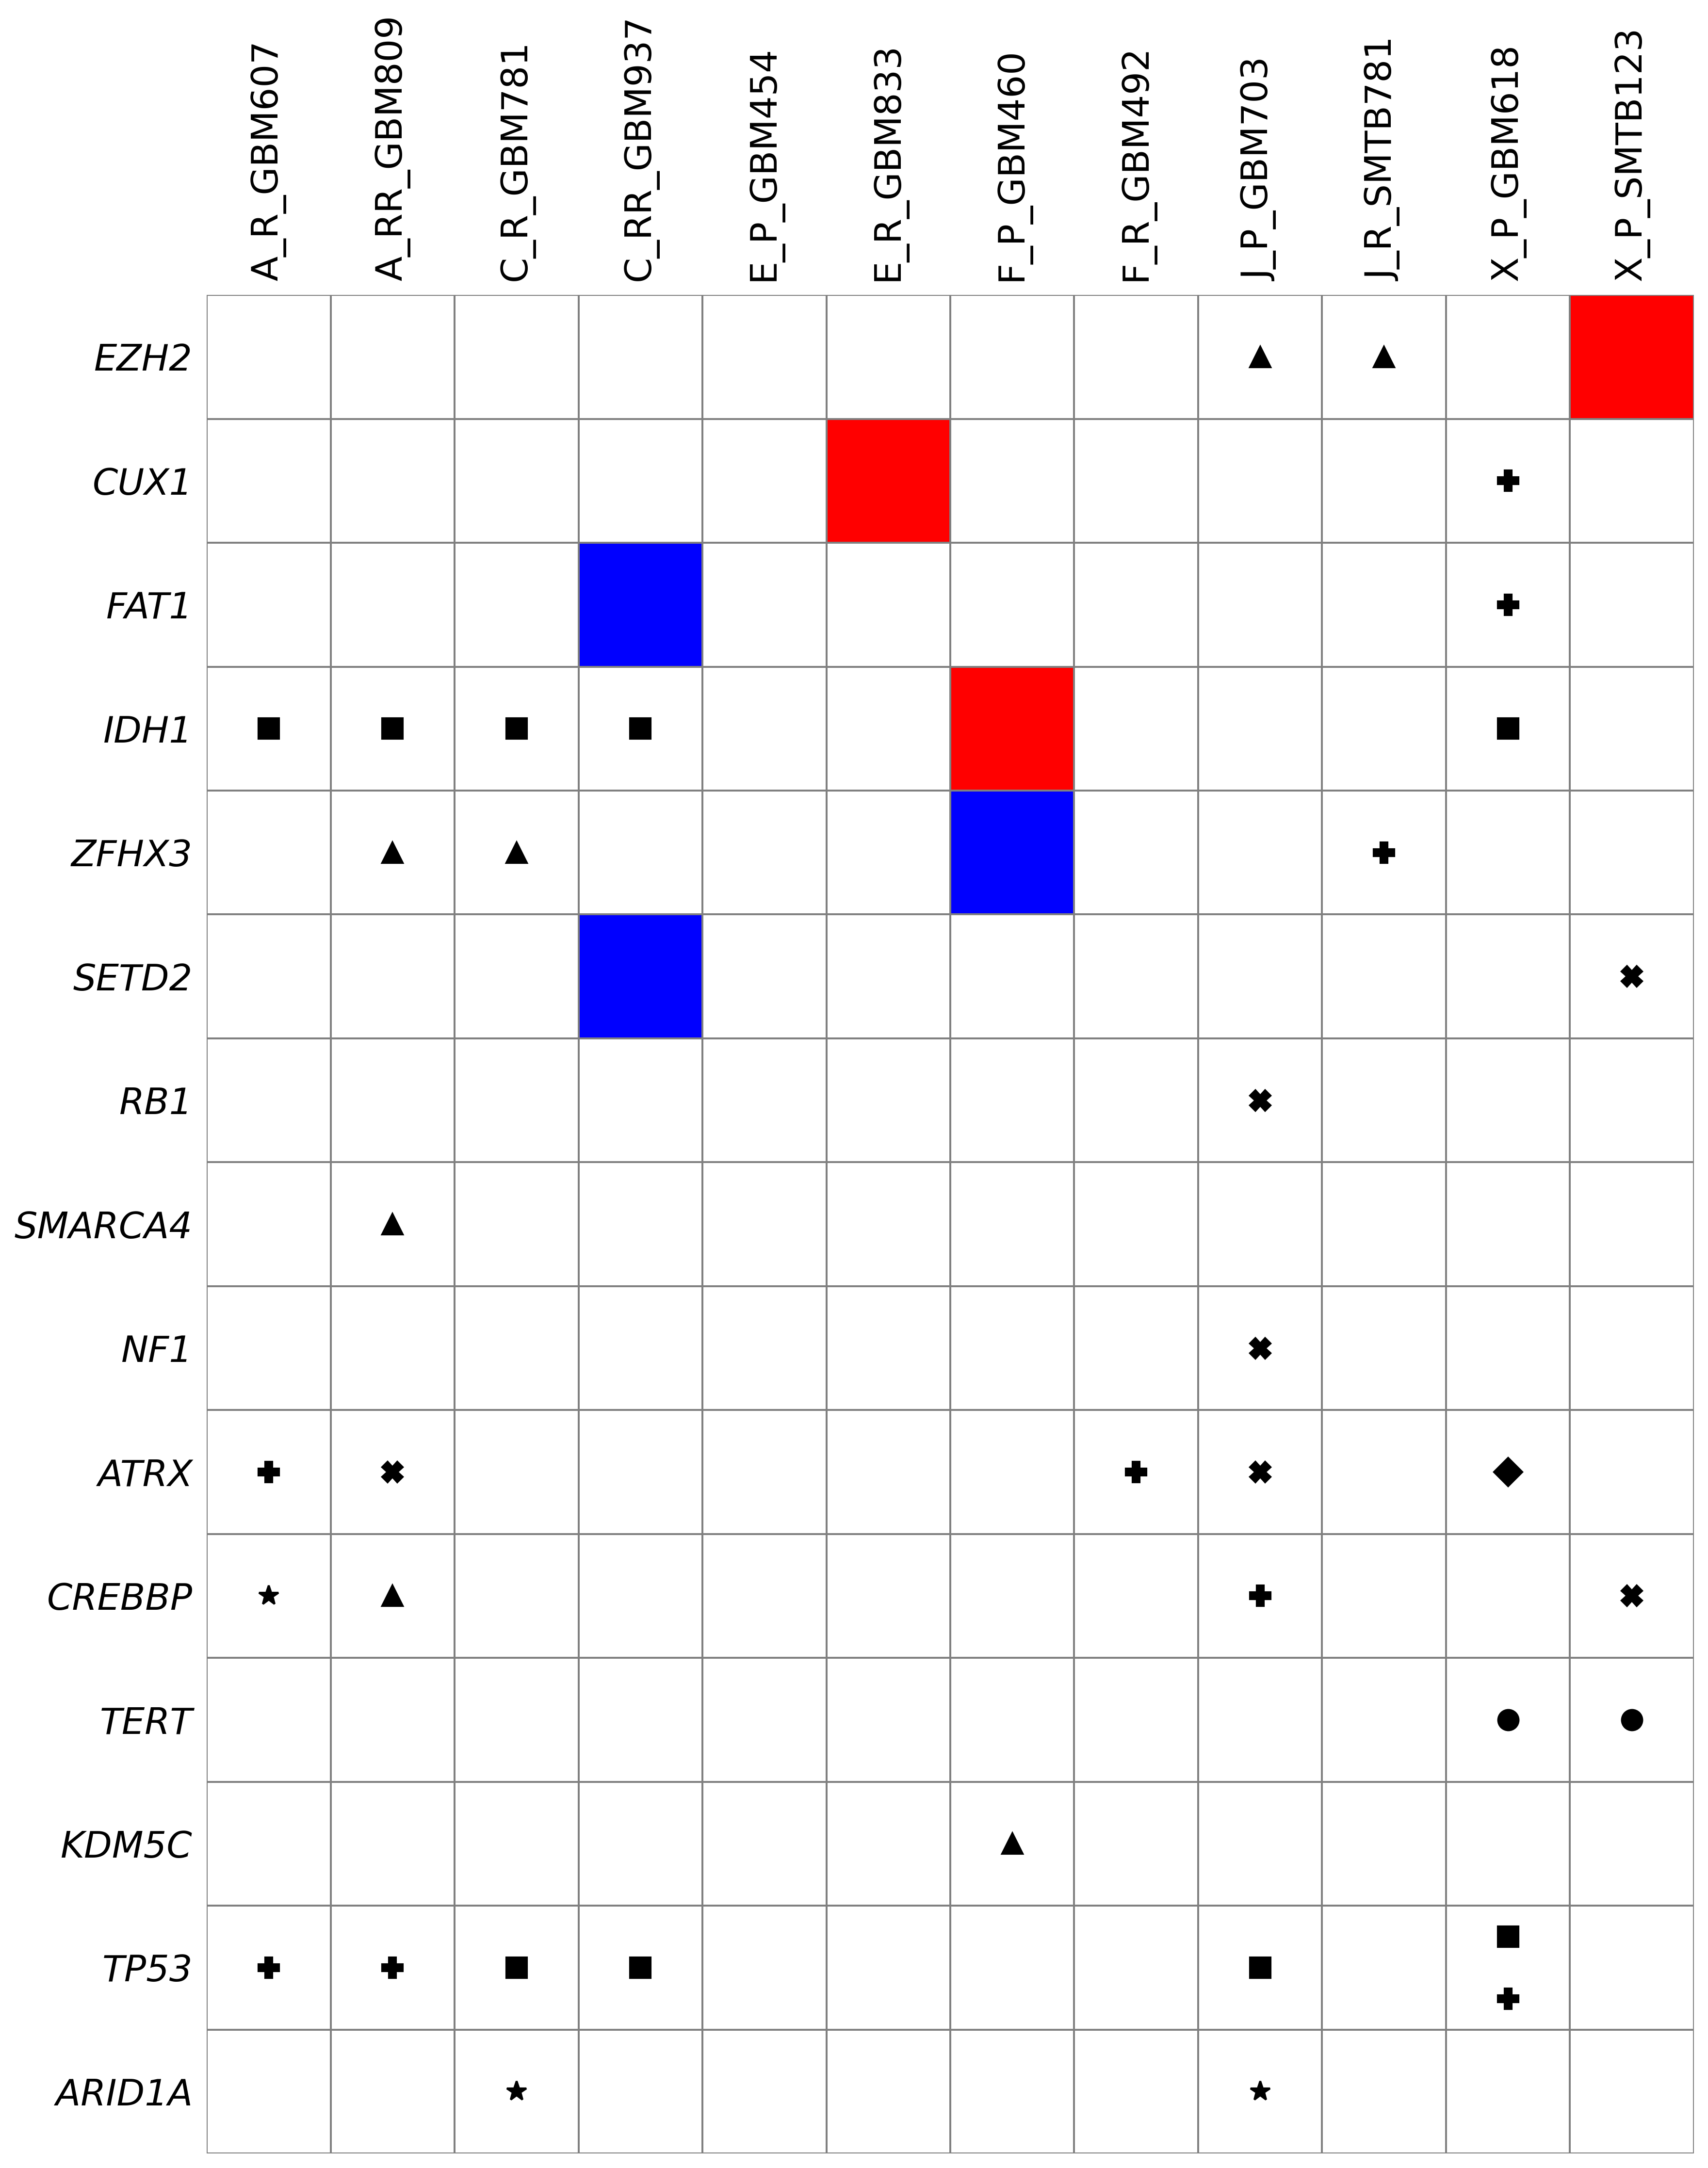

In [42]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(20, 15), dpi=300)

mpl.rcParams['font.family'] = 'sans-serif'

# Define the color map for the heatmap
cmap = {0: 'white', 1: 'blue', 2: 'red'}

colors = [cmap[i] for i in range(0, 3)]

heatmap_cmap = mpl.colors.ListedColormap(colors)

# Create the heatmap
sns.heatmap(SV_to_plot_df1, cmap=heatmap_cmap, ax=ax, linewidths=.5, linecolor='gray', 
            cbar=False, square=True, vmin=0, vmax=2)
            
# Iterate through new info DataFrame to plot dots and stars
for y in range(len(SNV_to_plot_df1)):
    for x in range(len(SNV_to_plot_df1.columns)):
        value = SNV_to_plot_df1.iloc[y, x]
        
        if value == 1:
            ax.plot(x + 0.5, y + 0.5, marker='o', color='black', markersize=10)
        
        if value == 2:
            ax.plot(x + 0.5, y + 0.5, marker='X', color='black', markersize=10)  
        
        if value == 3:
            ax.plot(x + 0.5, y + 0.5, marker='P', color='black', markersize=10)  
            
        if value == 4:
            ax.plot(x + 0.5, y + 0.5, marker='s', color='black', markersize=10)  
            
        if value == 5:
            ax.plot(x + 0.5, y + 0.5, marker='*', color='black', markersize=10)  
            
        if value == 6:
            ax.plot(x + 0.5, y + 0.5, marker='D', color='black', markersize=10)  
            
        if value == 7:
            ax.plot(x + 0.5, y + 0.5, marker='^', color='black', markersize=10)  
            
        if value == 8:
            ax.plot(x + 0.5, y + 0.25, marker='s', color='black', markersize=10)  
            ax.plot(x + 0.5, y + 0.75, marker='P', color='black', markersize=10)  

# Move the y-axis labels to the left and x-axis labels to the top
ax.yaxis.tick_left()
ax.xaxis.tick_top()

# Set the tick label color and size
ax.tick_params(axis='both', colors='black', labelsize=18)
for label in ax.get_yticklabels():
    label.set_fontstyle('italic')

# Remove the ticks while keeping the labels
ax.yaxis.set_tick_params(width=0)
ax.xaxis.set_tick_params(width=0)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()


In [43]:
new_sample_list

['A_R_GBM607',
 'A_RR_GBM809',
 'C_R_GBM781',
 'C_RR_GBM937',
 'E_P_GBM454',
 'E_R_GBM833',
 'F_P_GBM460',
 'F_R_GBM492',
 'J_P_GBM703',
 'J_R_SMTB781',
 'X_P_GBM618',
 'X_P_SMTB123']

In [44]:
sample_wo_snv_list = [sample for sample in glioma_driver_DEL_count_df.columns if sample not in new_sample_list]

sample_wo_snv_list

['B_P_GBM593',
 'B_R_GBM898',
 'D_P_GBM620',
 'D_R_GBM691',
 'G_P_GBM401',
 'G_R_GBM498',
 'G_RR_GBM551',
 'H_P_GBM529',
 'H_R_GBM832',
 'I_P_BT2013110',
 'I_R_GBM745',
 'X_P_GBM577',
 'X_P_GBM440',
 'X_P_GBM672',
 'X_R_SMTB135',
 'X_R_SMTB241',
 'X_R_SMTB302',
 'X_R_SMTB814',
 'X_R_GBM945']

In [45]:
SV_w_snv_sample_count_dict = {'gene': [], 'del_count': [], 'dup_count': [], 'inv_count': []}
SV_wo_snv_sample_count_dict = {'gene': [], 'del_count': [], 'dup_count': [], 'inv_count': []}

for gene in graph_order_w_sv:
    
    SV_w_snv_sample_count_dict['gene'].append(gene)
    SV_wo_snv_sample_count_dict['gene'].append(gene)
    
    SV_w_snv_sample_count_dict['del_count'].append(glioma_driver_DEL_count_df.loc[gene, new_sample_list].sum())
    SV_wo_snv_sample_count_dict['del_count'].append(glioma_driver_DEL_count_df.loc[gene, sample_wo_snv_list].sum())
    
    SV_w_snv_sample_count_dict['dup_count'].append(glioma_driver_DUP_count_df.loc[gene, new_sample_list].sum())
    SV_wo_snv_sample_count_dict['dup_count'].append(glioma_driver_DUP_count_df.loc[gene, sample_wo_snv_list].sum())
    
    SV_w_snv_sample_count_dict['inv_count'].append(glioma_driver_INV_count_df.loc[gene, new_sample_list].sum())
    SV_wo_snv_sample_count_dict['inv_count'].append(glioma_driver_INV_count_df.loc[gene, sample_wo_snv_list].sum())

SV_w_snv_sample_count_df = pd.DataFrame.from_dict(SV_w_snv_sample_count_dict)
SV_wo_snv_sample_count_df = pd.DataFrame.from_dict(SV_wo_snv_sample_count_dict)

In [46]:
SV_w_snv_sample_count_df

,gene,del_count,dup_count,inv_count
0,EZH2,0,1,0
1,CUX1,0,1,0
2,FAT1,1,0,0
3,IDH1,0,1,0
4,ZFHX3,1,0,0
5,SETD2,1,0,0
6,RB1,0,0,0
7,SMARCA4,0,0,0
8,NF1,0,0,0
9,ATRX,0,0,0


In [47]:
SV_wo_snv_sample_count_df

,gene,del_count,dup_count,inv_count
0,EZH2,0,9,0
1,CUX1,0,7,0
2,FAT1,0,1,0
3,IDH1,0,0,0
4,ZFHX3,0,0,0
5,SETD2,0,0,0
6,RB1,3,1,0
7,SMARCA4,1,2,0
8,NF1,3,0,0
9,ATRX,0,2,0


# Plot 2

In [48]:
new_graph_order = [
 'ZFHX3', 
 'FAT1',
 'SETD2',
 
 'RB1',
 'NF1',
 'SMARCA4',

 'CREBBP',
 'TERT',
 'TP53',
 'ARID1A',

 'IDH1',
 'ATRX']

In [49]:
SV_pre_plot_df2, SNV_pre_plot_df2 = \
generate_heatmap_df(glioma_driver_DEL_count_df, glioma_driver_DUP_count_df, glioma_driver_INV_count_df, \
                    new_sample_list, new_graph_order, oncokb_oncogenic_dfs_filtered)

In [50]:
SV_to_plot_df2 = pd.DataFrame(0, index=SV_pre_plot_df2.index, columns=SV_pre_plot_df2.columns)

for gene in SV_to_plot_df2.index:
    
    for sample in SV_to_plot_df2.columns:
        
        if SV_pre_plot_df2.loc[gene, sample] == ['DEL']:
            
            SV_to_plot_df2.loc[gene, sample] = 1
            
        elif SV_pre_plot_df2.loc[gene, sample] == ['DUP']:

            SV_to_plot_df2.loc[gene, sample] = 2
            
        else:
            
            if SV_pre_plot_df2.loc[gene, sample] != []:
                
                print(SV_pre_plot_df2.loc[gene, sample])

In [ ]:
'''
'5'Flank' = 1
'Frame_Shift_Del' = 2
'Frame_Shift_Ins' = 3
'Missense_Mutation' = 4
'Nonsense_Mutation' = 5
'Splice_Site' = 6
'Splice_Region' = 7
'Missense_Mutation, Frame_Shift_Ins' = 8
'''

'''
1 = 'o'
2 = 'X'
3 = 'P'
4 = 's'
5 = '*'
6 = 'D'
7 = '^'
8 = 's' + 'P'
'''

In [51]:
SNV_to_plot_df2 = pd.DataFrame(0, index=SNV_pre_plot_df2.index, columns=SNV_pre_plot_df2.columns)

for gene in SNV_to_plot_df2.index:
    
    for sample in SNV_to_plot_df2.columns:
        
        if SNV_pre_plot_df2.loc[gene, sample] == ["5'Flank"]:
            
            SNV_to_plot_df2.loc[gene, sample] = 1
            
        elif SNV_pre_plot_df2.loc[gene, sample] == ["Frame_Shift_Del"]:

            SNV_to_plot_df2.loc[gene, sample] = 2
            
        elif SNV_pre_plot_df2.loc[gene, sample] == ["Frame_Shift_Ins"]:

            SNV_to_plot_df2.loc[gene, sample] = 3
            
        elif SNV_pre_plot_df2.loc[gene, sample] == ["Missense_Mutation"]:

            SNV_to_plot_df2.loc[gene, sample] = 4
            
        elif SNV_pre_plot_df2.loc[gene, sample] == ["Nonsense_Mutation"]:

            SNV_to_plot_df2.loc[gene, sample] = 5
            
        elif SNV_pre_plot_df2.loc[gene, sample] == ["Splice_Site"]:

            SNV_to_plot_df2.loc[gene, sample] = 6
            
        elif SNV_pre_plot_df2.loc[gene, sample] == ["Splice_Region"]:

            SNV_to_plot_df2.loc[gene, sample] = 7
            
        elif SNV_pre_plot_df2.loc[gene, sample] == ["Missense_Mutation", "Frame_Shift_Ins"]:

            SNV_to_plot_df2.loc[gene, sample] = 8
            
        else:
            
            if SNV_pre_plot_df2.loc[gene, sample] != []:
                
                print(SNV_pre_plot_df2.loc[gene, sample])

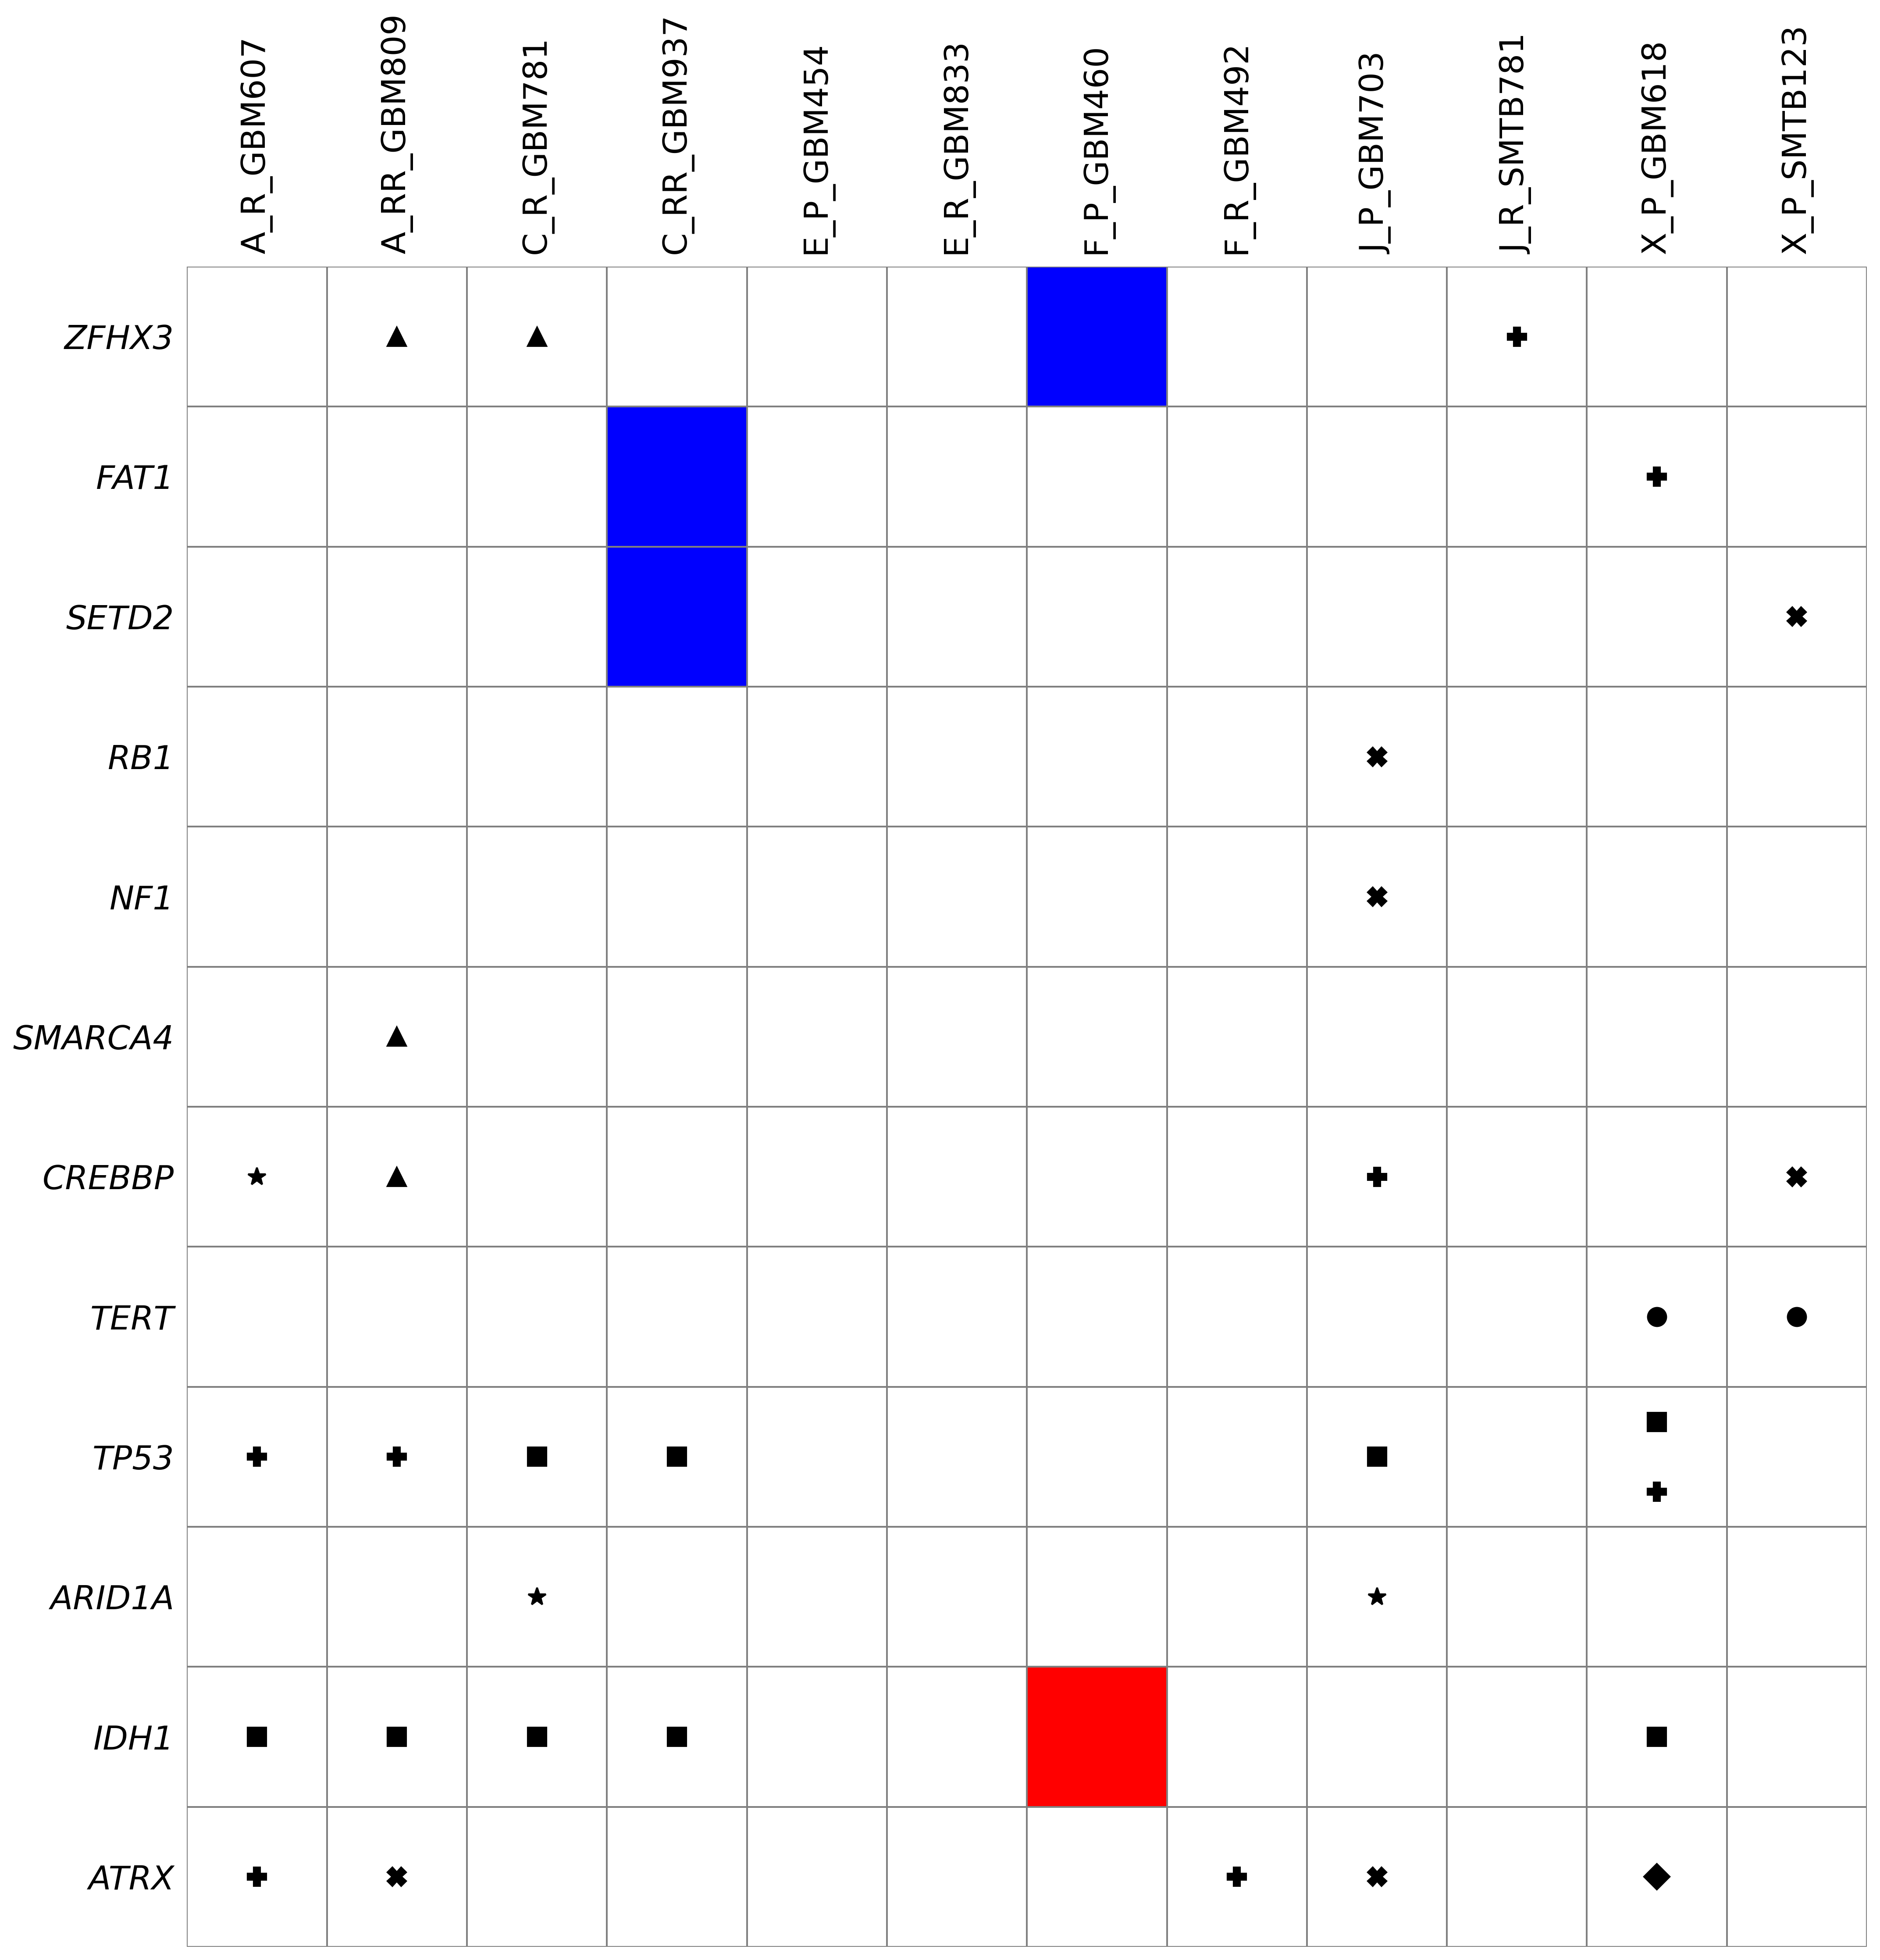

In [52]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(20, 15), dpi=300)

mpl.rcParams['font.family'] = 'sans-serif'

# Define the color map for the heatmap
cmap = {0: 'white', 1: 'blue', 2: 'red'}

colors = [cmap[i] for i in range(0, 3)]

heatmap_cmap = mpl.colors.ListedColormap(colors)

# Create the heatmap
sns.heatmap(SV_to_plot_df2, cmap=heatmap_cmap, ax=ax, linewidths=.5, linecolor='gray', 
            cbar=False, square=True, vmin=0, vmax=2)
            
# Iterate through new info DataFrame to plot dots and stars
for y in range(len(SNV_to_plot_df2)):
    for x in range(len(SNV_to_plot_df2.columns)):
        value = SNV_to_plot_df2.iloc[y, x]
        
        if value == 1:
            ax.plot(x + 0.5, y + 0.5, marker='o', color='black', markersize=10)
        
        if value == 2:
            ax.plot(x + 0.5, y + 0.5, marker='X', color='black', markersize=10)  
        
        if value == 3:
            ax.plot(x + 0.5, y + 0.5, marker='P', color='black', markersize=10)  
            
        if value == 4:
            ax.plot(x + 0.5, y + 0.5, marker='s', color='black', markersize=10)  
            
        if value == 5:
            ax.plot(x + 0.5, y + 0.5, marker='*', color='black', markersize=10)  
            
        if value == 6:
            ax.plot(x + 0.5, y + 0.5, marker='D', color='black', markersize=10)  
            
        if value == 7:
            ax.plot(x + 0.5, y + 0.5, marker='^', color='black', markersize=10)  
            
        if value == 8:
            ax.plot(x + 0.5, y + 0.25, marker='s', color='black', markersize=10)  
            ax.plot(x + 0.5, y + 0.75, marker='P', color='black', markersize=10)  

# Move the y-axis labels to the left and x-axis labels to the top
ax.yaxis.tick_left()
ax.xaxis.tick_top()

# Set the tick label color and size
ax.tick_params(axis='both', colors='black', labelsize=18)
for label in ax.get_yticklabels():
    label.set_fontstyle('italic')

# Remove the ticks while keeping the labels
ax.yaxis.set_tick_params(width=0)
ax.xaxis.set_tick_params(width=0)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()


In [54]:
def generate_SV_only_heatmap_df(DEL_heatmap_df, DUP_heatmap_df, INV_heatmap_df, sample_list, gene_list):
    
    SV_output_df = pd.DataFrame(index=gene_list, columns=sample_list)
    
    for gene in gene_list:
        
        for sample in sample_list:
            
            # Initialize cells with empty lists if not already initialized
            if pd.isna(SV_output_df.loc[gene, sample]):
                
                SV_output_df.loc[gene, sample] = []
                
            ### SV OUTPUT ###
            
            if gene in list(DEL_heatmap_df.index):

                if DEL_heatmap_df.loc[gene, sample] != 0:

                    SV_output_df.loc[gene, sample].append('DEL')

                if DUP_heatmap_df.loc[gene, sample] != 0:

                    SV_output_df.loc[gene, sample].append('DUP')

                if INV_heatmap_df.loc[gene, sample] != 0:

                    SV_output_df.loc[gene, sample].append('INV')
                                                
    return SV_output_df

In [55]:
sample_wo_snv_list

['B_P_GBM593',
 'B_R_GBM898',
 'D_P_GBM620',
 'D_R_GBM691',
 'G_P_GBM401',
 'G_R_GBM498',
 'G_RR_GBM551',
 'H_P_GBM529',
 'H_R_GBM832',
 'I_P_BT2013110',
 'I_R_GBM745',
 'X_P_GBM577',
 'X_P_GBM440',
 'X_P_GBM672',
 'X_R_SMTB135',
 'X_R_SMTB241',
 'X_R_SMTB302',
 'X_R_SMTB814',
 'X_R_GBM945']

In [56]:
SV_pre_plot_df3 = \
generate_SV_only_heatmap_df(glioma_driver_DEL_count_df, glioma_driver_DUP_count_df, glioma_driver_INV_count_df, \
                            sample_wo_snv_list, new_graph_order)

In [57]:
SV_pre_plot_df3

,B_P_GBM593,B_R_GBM898,D_P_GBM620,D_R_GBM691,G_P_GBM401,G_R_GBM498,G_RR_GBM551,H_P_GBM529,H_R_GBM832,I_P_BT2013110,I_R_GBM745,X_P_GBM577,X_P_GBM440,X_P_GBM672,X_R_SMTB135,X_R_SMTB241,X_R_SMTB302,X_R_SMTB814,X_R_GBM945
ZFHX3,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
FAT1,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[DUP],[],[],[]
SETD2,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
RB1,[DUP],[],[],[],[],[],[],[],[DEL],[],[],[],[DEL],[],[],[],[],[],[DEL]
NF1,[],[],[],[],[],[DEL],[DEL],[],[],[],[],[],[],[],[DEL],[],[],[],[]
SMARCA4,[],[],[],[DUP],[],[],[],[],[],[],[],[],[],[DUP],[],[],[],[],[DEL]
CREBBP,[],[],[],[],[],[],[],[],[],[],[],[],[],[DEL],[],[DUP],[],[],[]
TERT,[],[],[],[],[],[DEL],[DEL],[],[],[],[],[],[],[],[],[],[],[],[]
TP53,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[DEL],[],[],[]
ARID1A,[],[],[DEL],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]


In [58]:
SV_to_plot_df3 = pd.DataFrame(0, index=SV_pre_plot_df3.index, columns=SV_pre_plot_df3.columns)

for gene in SV_to_plot_df3.index:
    
    for sample in SV_to_plot_df3.columns:
        
        if SV_pre_plot_df3.loc[gene, sample] == ['DEL']:
            
            SV_to_plot_df3.loc[gene, sample] = 1
            
        elif SV_pre_plot_df3.loc[gene, sample] == ['DUP']:

            SV_to_plot_df3.loc[gene, sample] = 2
            
        else:
            
            if SV_pre_plot_df3.loc[gene, sample] != []:
                
                print(SV_pre_plot_df3.loc[gene, sample])

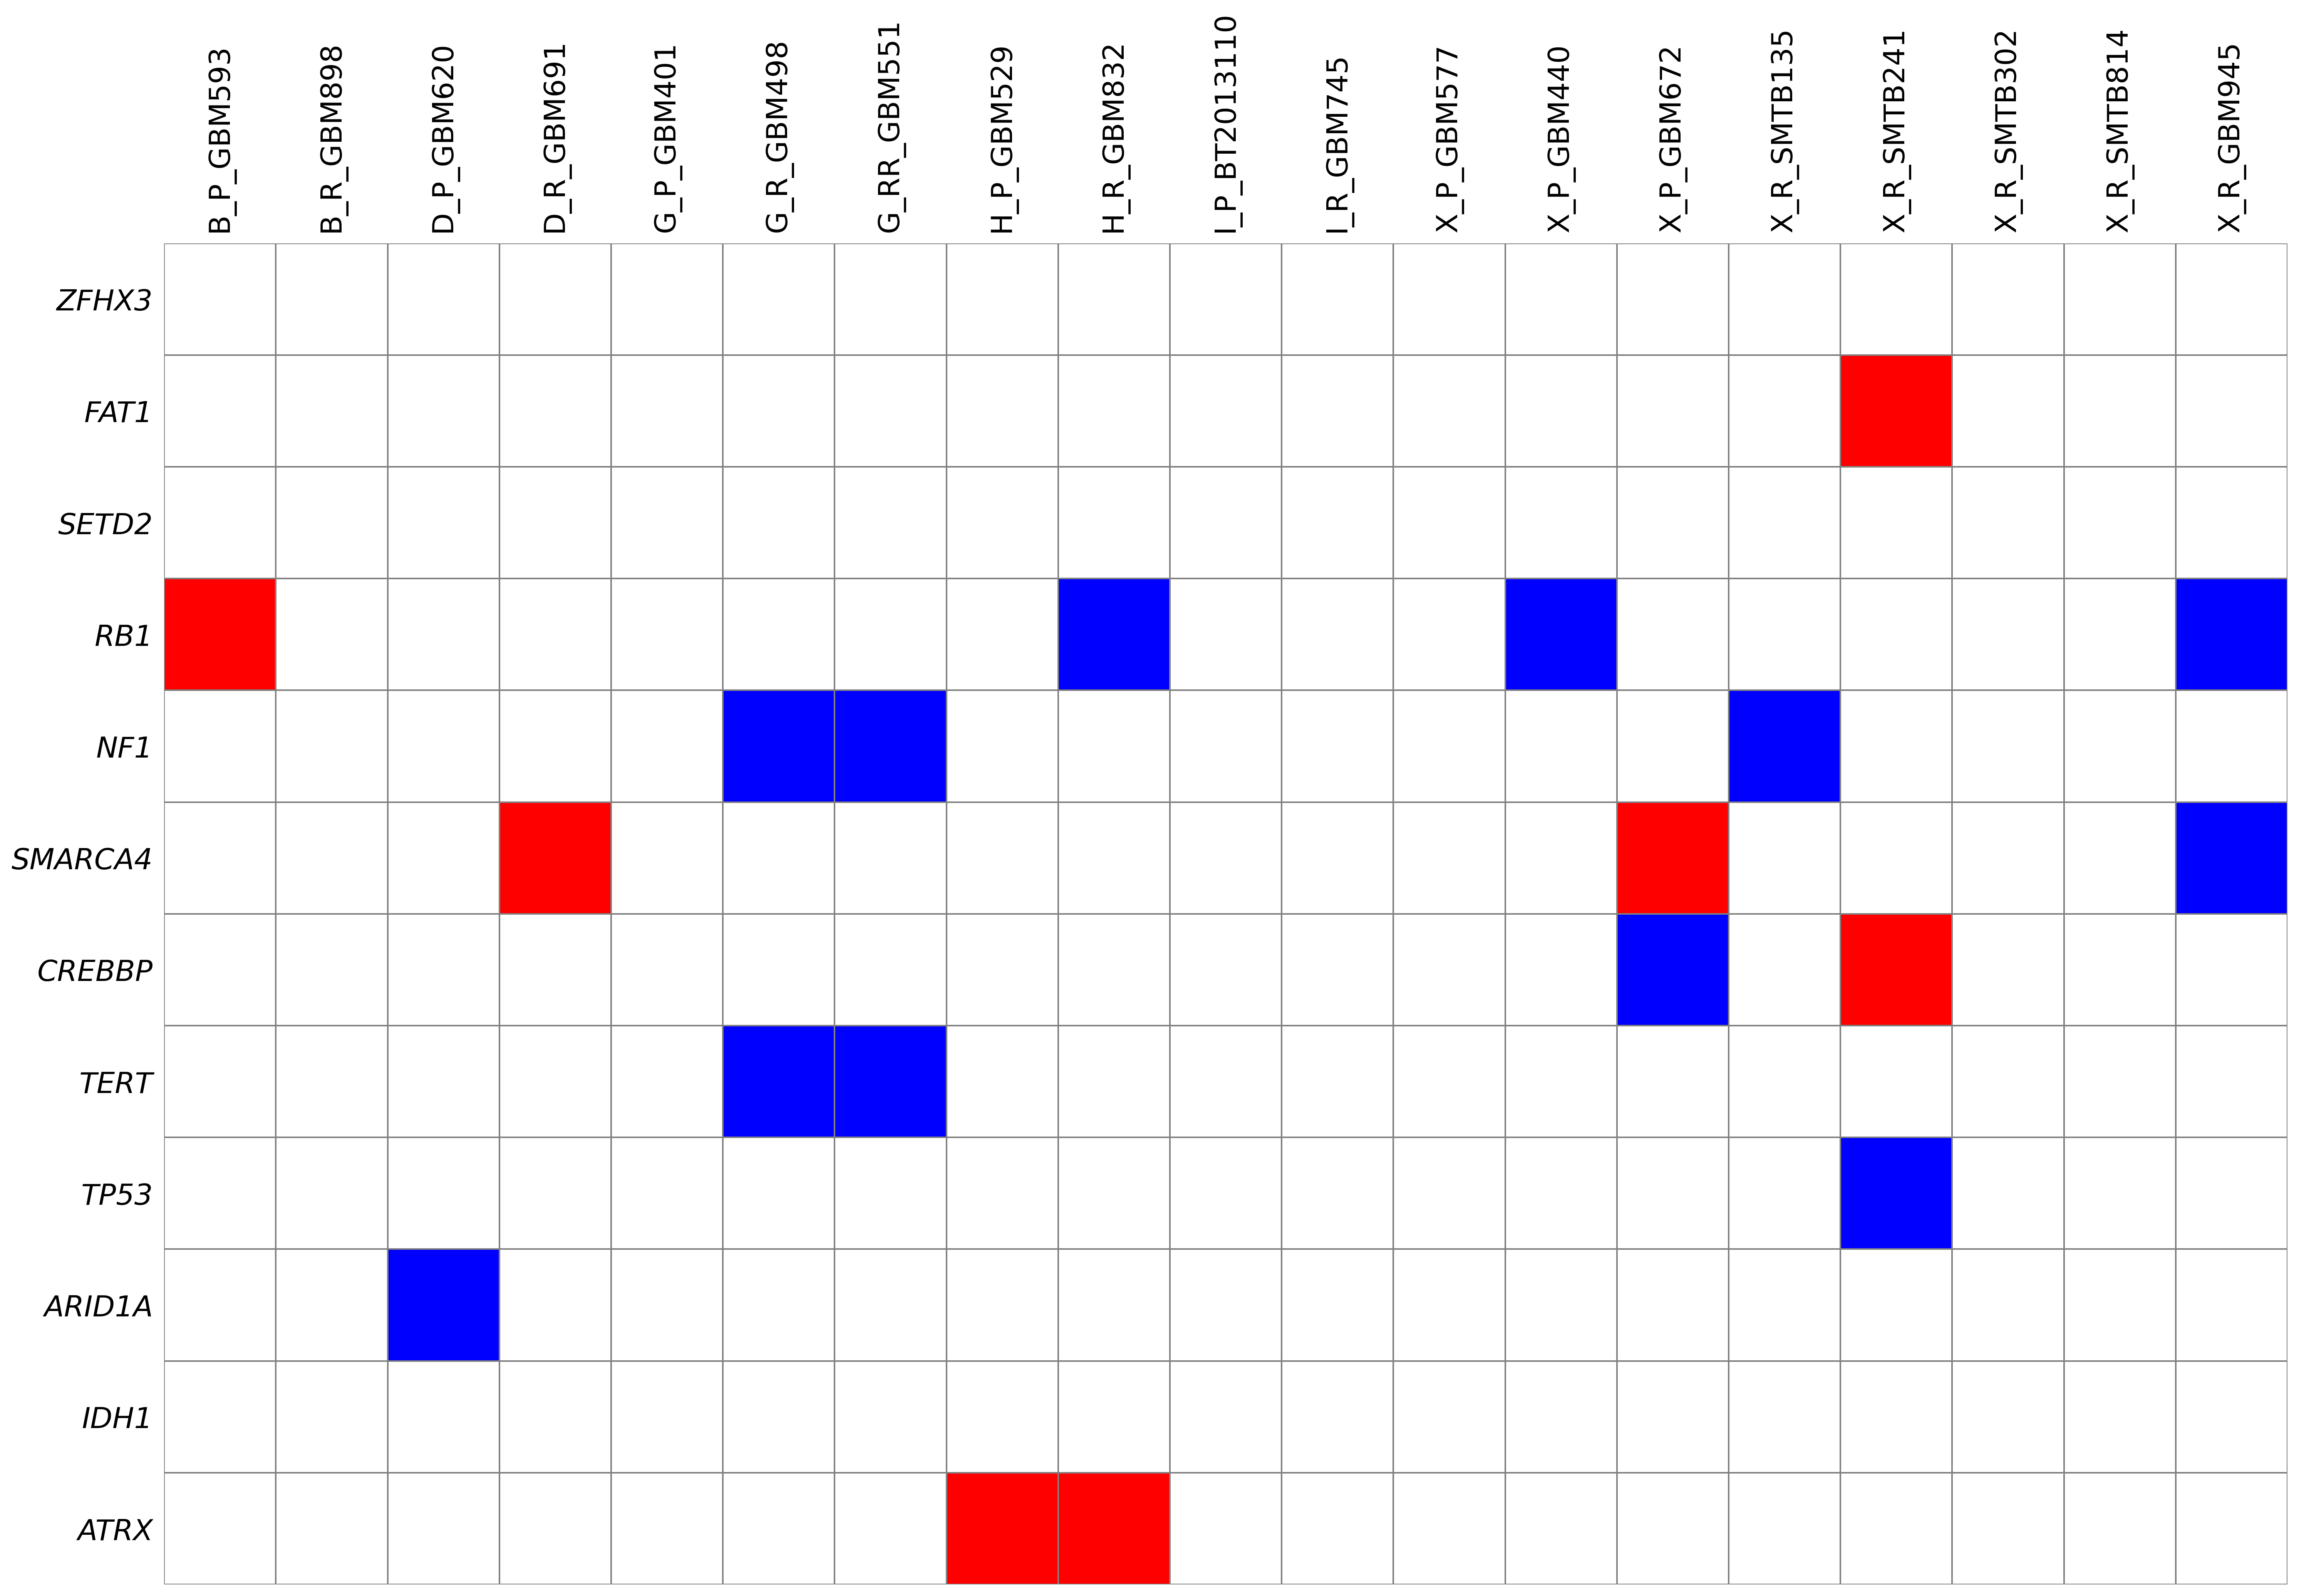

In [61]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(20, 15), dpi=300)

mpl.rcParams['font.family'] = 'sans-serif'

# Define the color map for the heatmap
cmap = {0: 'white', 1: 'blue', 2: 'red'}

colors = [cmap[i] for i in range(0, 3)]

heatmap_cmap = mpl.colors.ListedColormap(colors)

# Create the heatmap
sns.heatmap(SV_to_plot_df3, cmap=heatmap_cmap, ax=ax, linewidths=.5, linecolor='gray', 
            cbar=False, square=True, vmin=0, vmax=2)
            
# Move the y-axis labels to the left and x-axis labels to the top
ax.yaxis.tick_left()
ax.xaxis.tick_top()

# Set the tick label color and size
ax.tick_params(axis='both', colors='black', labelsize=18)
for label in ax.get_yticklabels():
    label.set_fontstyle('italic')

# Remove the ticks while keeping the labels
ax.yaxis.set_tick_params(width=0)
ax.xaxis.set_tick_params(width=0)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()


In [63]:
SNV_to_plot_df3 = pd.DataFrame(0, index=SV_to_plot_df3.index, columns=SV_to_plot_df3.columns)

# Final Plot

In [66]:
SNV_to_plot_final = pd.concat([SNV_to_plot_df2, SNV_to_plot_df3], axis=1)

SNV_to_plot_final

,A_R_GBM607,A_RR_GBM809,C_R_GBM781,C_RR_GBM937,E_P_GBM454,E_R_GBM833,F_P_GBM460,F_R_GBM492,J_P_GBM703,J_R_SMTB781,X_P_GBM618,X_P_SMTB123,B_P_GBM593,B_R_GBM898,D_P_GBM620,D_R_GBM691,G_P_GBM401,G_R_GBM498,G_RR_GBM551,H_P_GBM529,H_R_GBM832,I_P_BT2013110,I_R_GBM745,X_P_GBM577,X_P_GBM440,X_P_GBM672,X_R_SMTB135,X_R_SMTB241,X_R_SMTB302,X_R_SMTB814,X_R_GBM945
ZFHX3,0,7,7,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAT1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SETD2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RB1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NF1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SMARCA4,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CREBBP,5,7,0,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TERT,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TP53,3,3,4,4,0,0,0,0,4,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ARID1A,0,0,5,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
SNV_to_plot_final.loc['TERT', 'X_P_SMTB123'] = 0

SNV_to_plot_final

,A_R_GBM607,A_RR_GBM809,C_R_GBM781,C_RR_GBM937,E_P_GBM454,E_R_GBM833,F_P_GBM460,F_R_GBM492,J_P_GBM703,J_R_SMTB781,X_P_GBM618,X_P_SMTB123,B_P_GBM593,B_R_GBM898,D_P_GBM620,D_R_GBM691,G_P_GBM401,G_R_GBM498,G_RR_GBM551,H_P_GBM529,H_R_GBM832,I_P_BT2013110,I_R_GBM745,X_P_GBM577,X_P_GBM440,X_P_GBM672,X_R_SMTB135,X_R_SMTB241,X_R_SMTB302,X_R_SMTB814,X_R_GBM945
ZFHX3,0,7,7,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAT1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SETD2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RB1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NF1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SMARCA4,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CREBBP,5,7,0,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TERT,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TP53,3,3,4,4,0,0,0,0,4,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ARID1A,0,0,5,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
SV_to_plot_final = pd.concat([SV_to_plot_df2, SV_to_plot_df3], axis=1)

SV_to_plot_final

,A_R_GBM607,A_RR_GBM809,C_R_GBM781,C_RR_GBM937,E_P_GBM454,E_R_GBM833,F_P_GBM460,F_R_GBM492,J_P_GBM703,J_R_SMTB781,X_P_GBM618,X_P_SMTB123,B_P_GBM593,B_R_GBM898,D_P_GBM620,D_R_GBM691,G_P_GBM401,G_R_GBM498,G_RR_GBM551,H_P_GBM529,H_R_GBM832,I_P_BT2013110,I_R_GBM745,X_P_GBM577,X_P_GBM440,X_P_GBM672,X_R_SMTB135,X_R_SMTB241,X_R_SMTB302,X_R_SMTB814,X_R_GBM945
ZFHX3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAT1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
SETD2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RB1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
NF1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
SMARCA4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1
CREBBP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0
TERT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
TP53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
ARID1A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


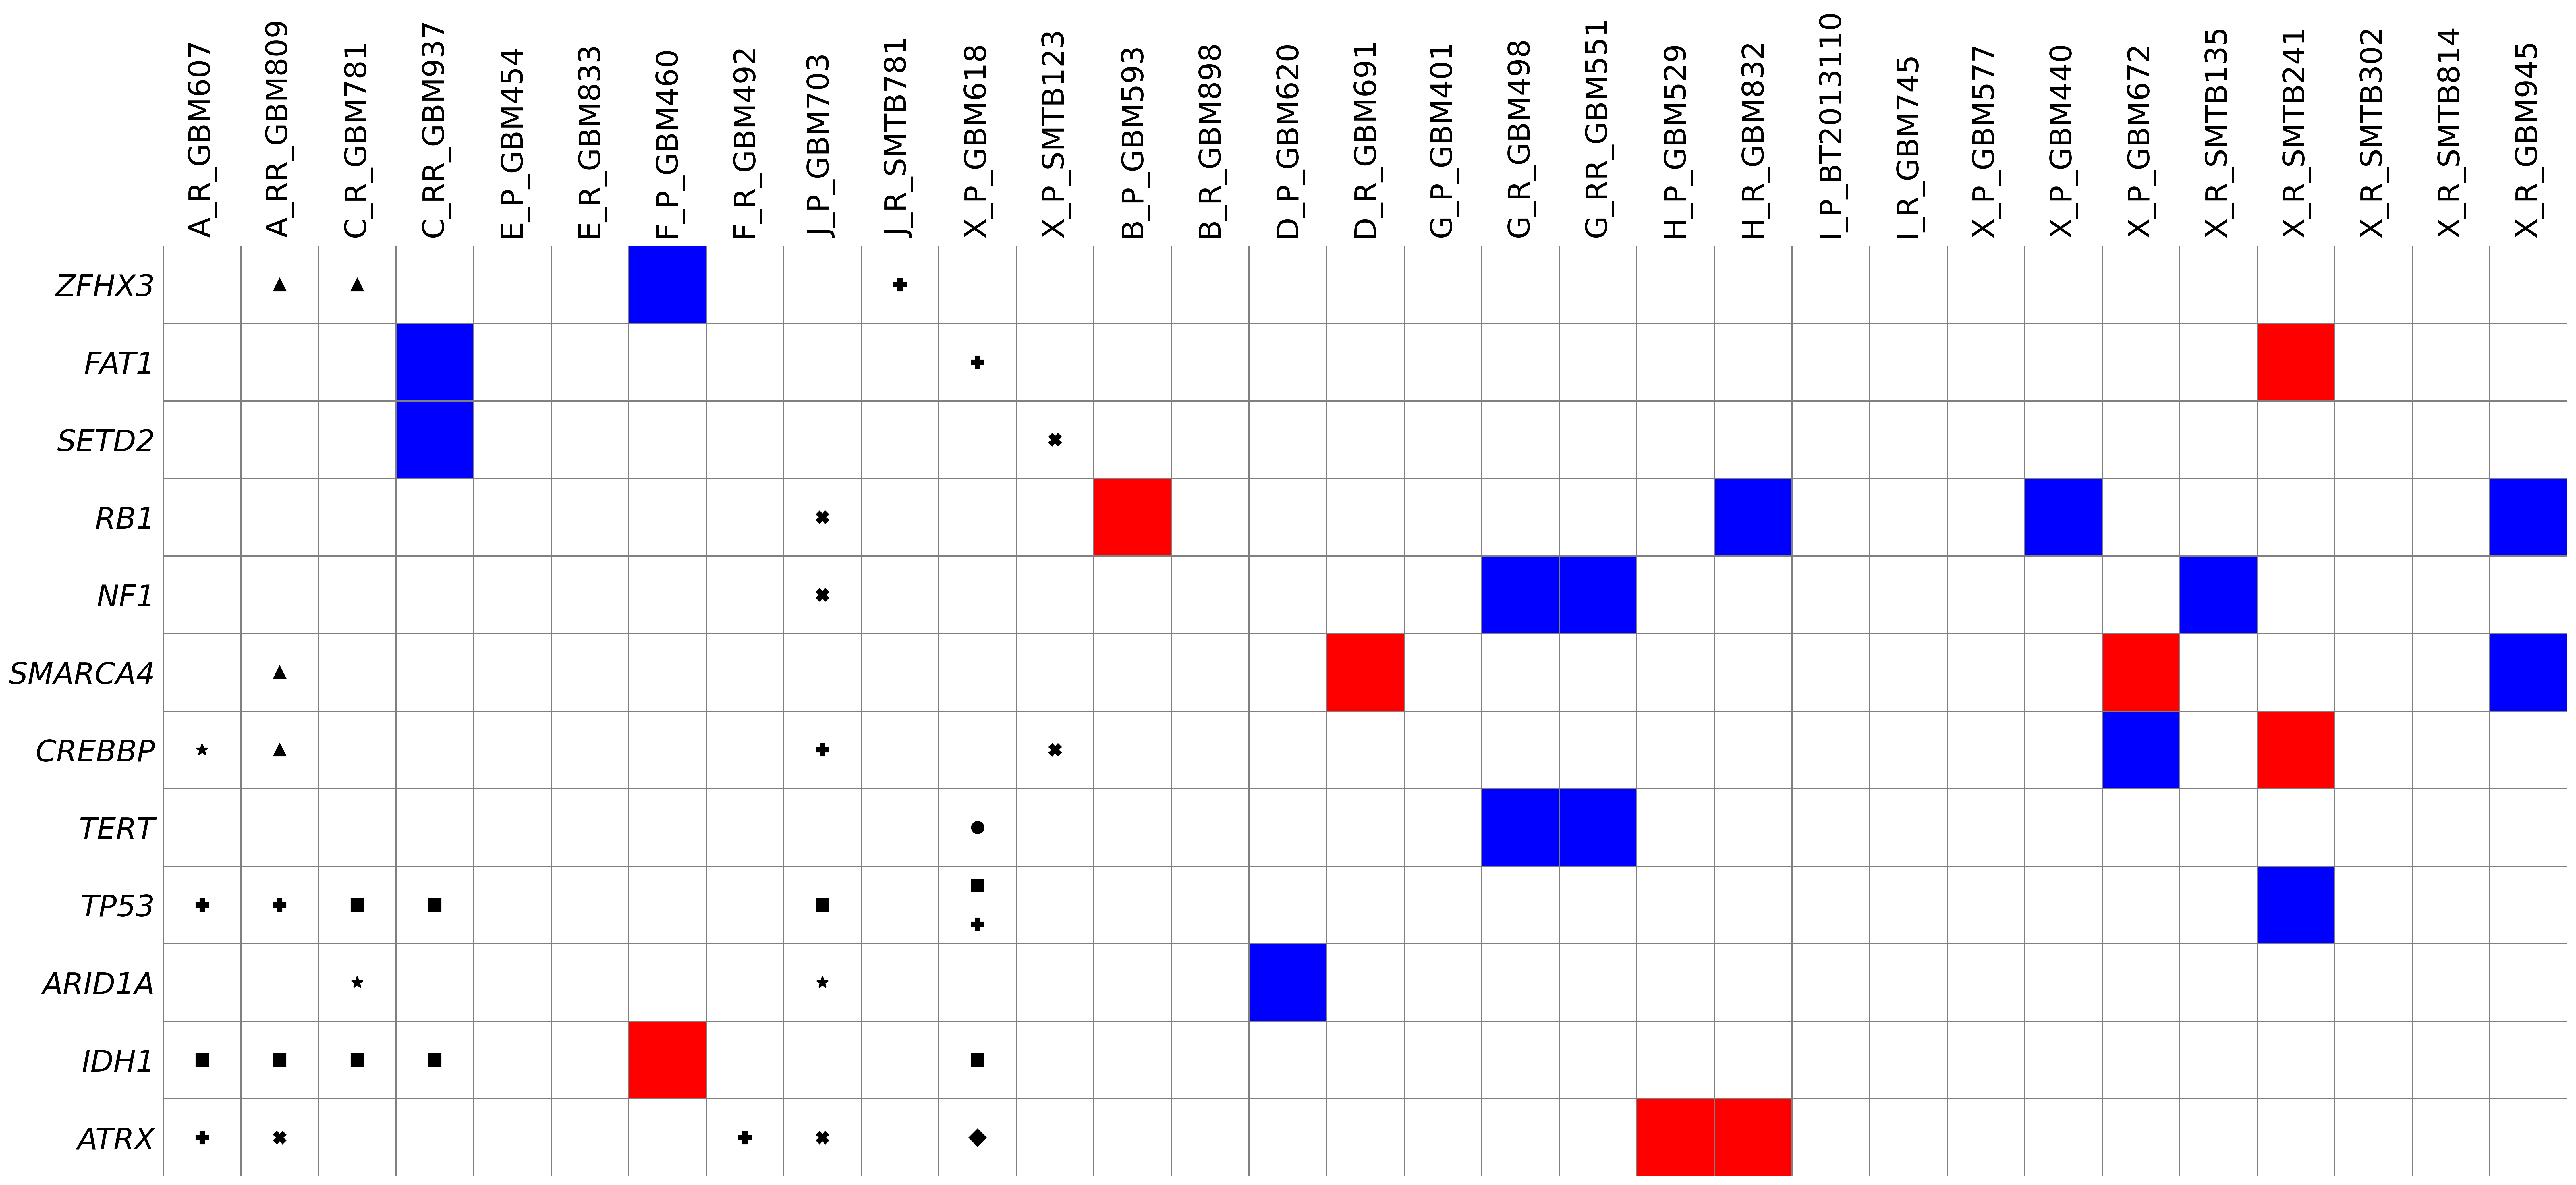

In [81]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(30, 20), dpi=300)

mpl.rcParams['font.family'] = 'sans-serif'

# Define the color map for the heatmap
cmap = {0: 'white', 1: 'blue', 2: 'red'}

colors = [cmap[i] for i in range(0, 3)]

heatmap_cmap = mpl.colors.ListedColormap(colors)

# Create the heatmap
sns.heatmap(SV_to_plot_final, cmap=heatmap_cmap, ax=ax, linewidths=.5, linecolor='gray', 
            cbar=False, square=True, vmin=0, vmax=2)
            
# Iterate through new info DataFrame to plot dots and stars
for y in range(len(SNV_to_plot_final)):
    for x in range(len(SNV_to_plot_final.columns)):
        value = SNV_to_plot_final.iloc[y, x]
        
        if value == 1:
            ax.plot(x + 0.5, y + 0.5, marker='o', color='black', markersize=10)
        
        if value == 2:
            ax.plot(x + 0.5, y + 0.5, marker='X', color='black', markersize=10)  
        
        if value == 3:
            ax.plot(x + 0.5, y + 0.5, marker='P', color='black', markersize=10)  
            
        if value == 4:
            ax.plot(x + 0.5, y + 0.5, marker='s', color='black', markersize=10)  
            
        if value == 5:
            ax.plot(x + 0.5, y + 0.5, marker='*', color='black', markersize=10)  
            
        if value == 6:
            ax.plot(x + 0.5, y + 0.5, marker='D', color='black', markersize=10)  
            
        if value == 7:
            ax.plot(x + 0.5, y + 0.5, marker='^', color='black', markersize=10)  
            
        if value == 8:
            ax.plot(x + 0.5, y + 0.25, marker='s', color='black', markersize=10)  
            ax.plot(x + 0.5, y + 0.75, marker='P', color='black', markersize=10)  

# Move the y-axis labels to the left and x-axis labels to the top
ax.yaxis.tick_left()
ax.xaxis.tick_top()

# Set the tick label color and size
ax.tick_params(axis='both', colors='black', labelsize=25)
for label in ax.get_yticklabels():
    label.set_fontstyle('italic')

# Remove the ticks while keeping the labels
ax.yaxis.set_tick_params(width=0)
ax.xaxis.set_tick_params(width=0)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()

fig.savefig('/Users/ryanyutian/Desktop/Manuscript/cap_output_analysis/SNV_SV_plot.png', dpi=300, bbox_inches='tight')

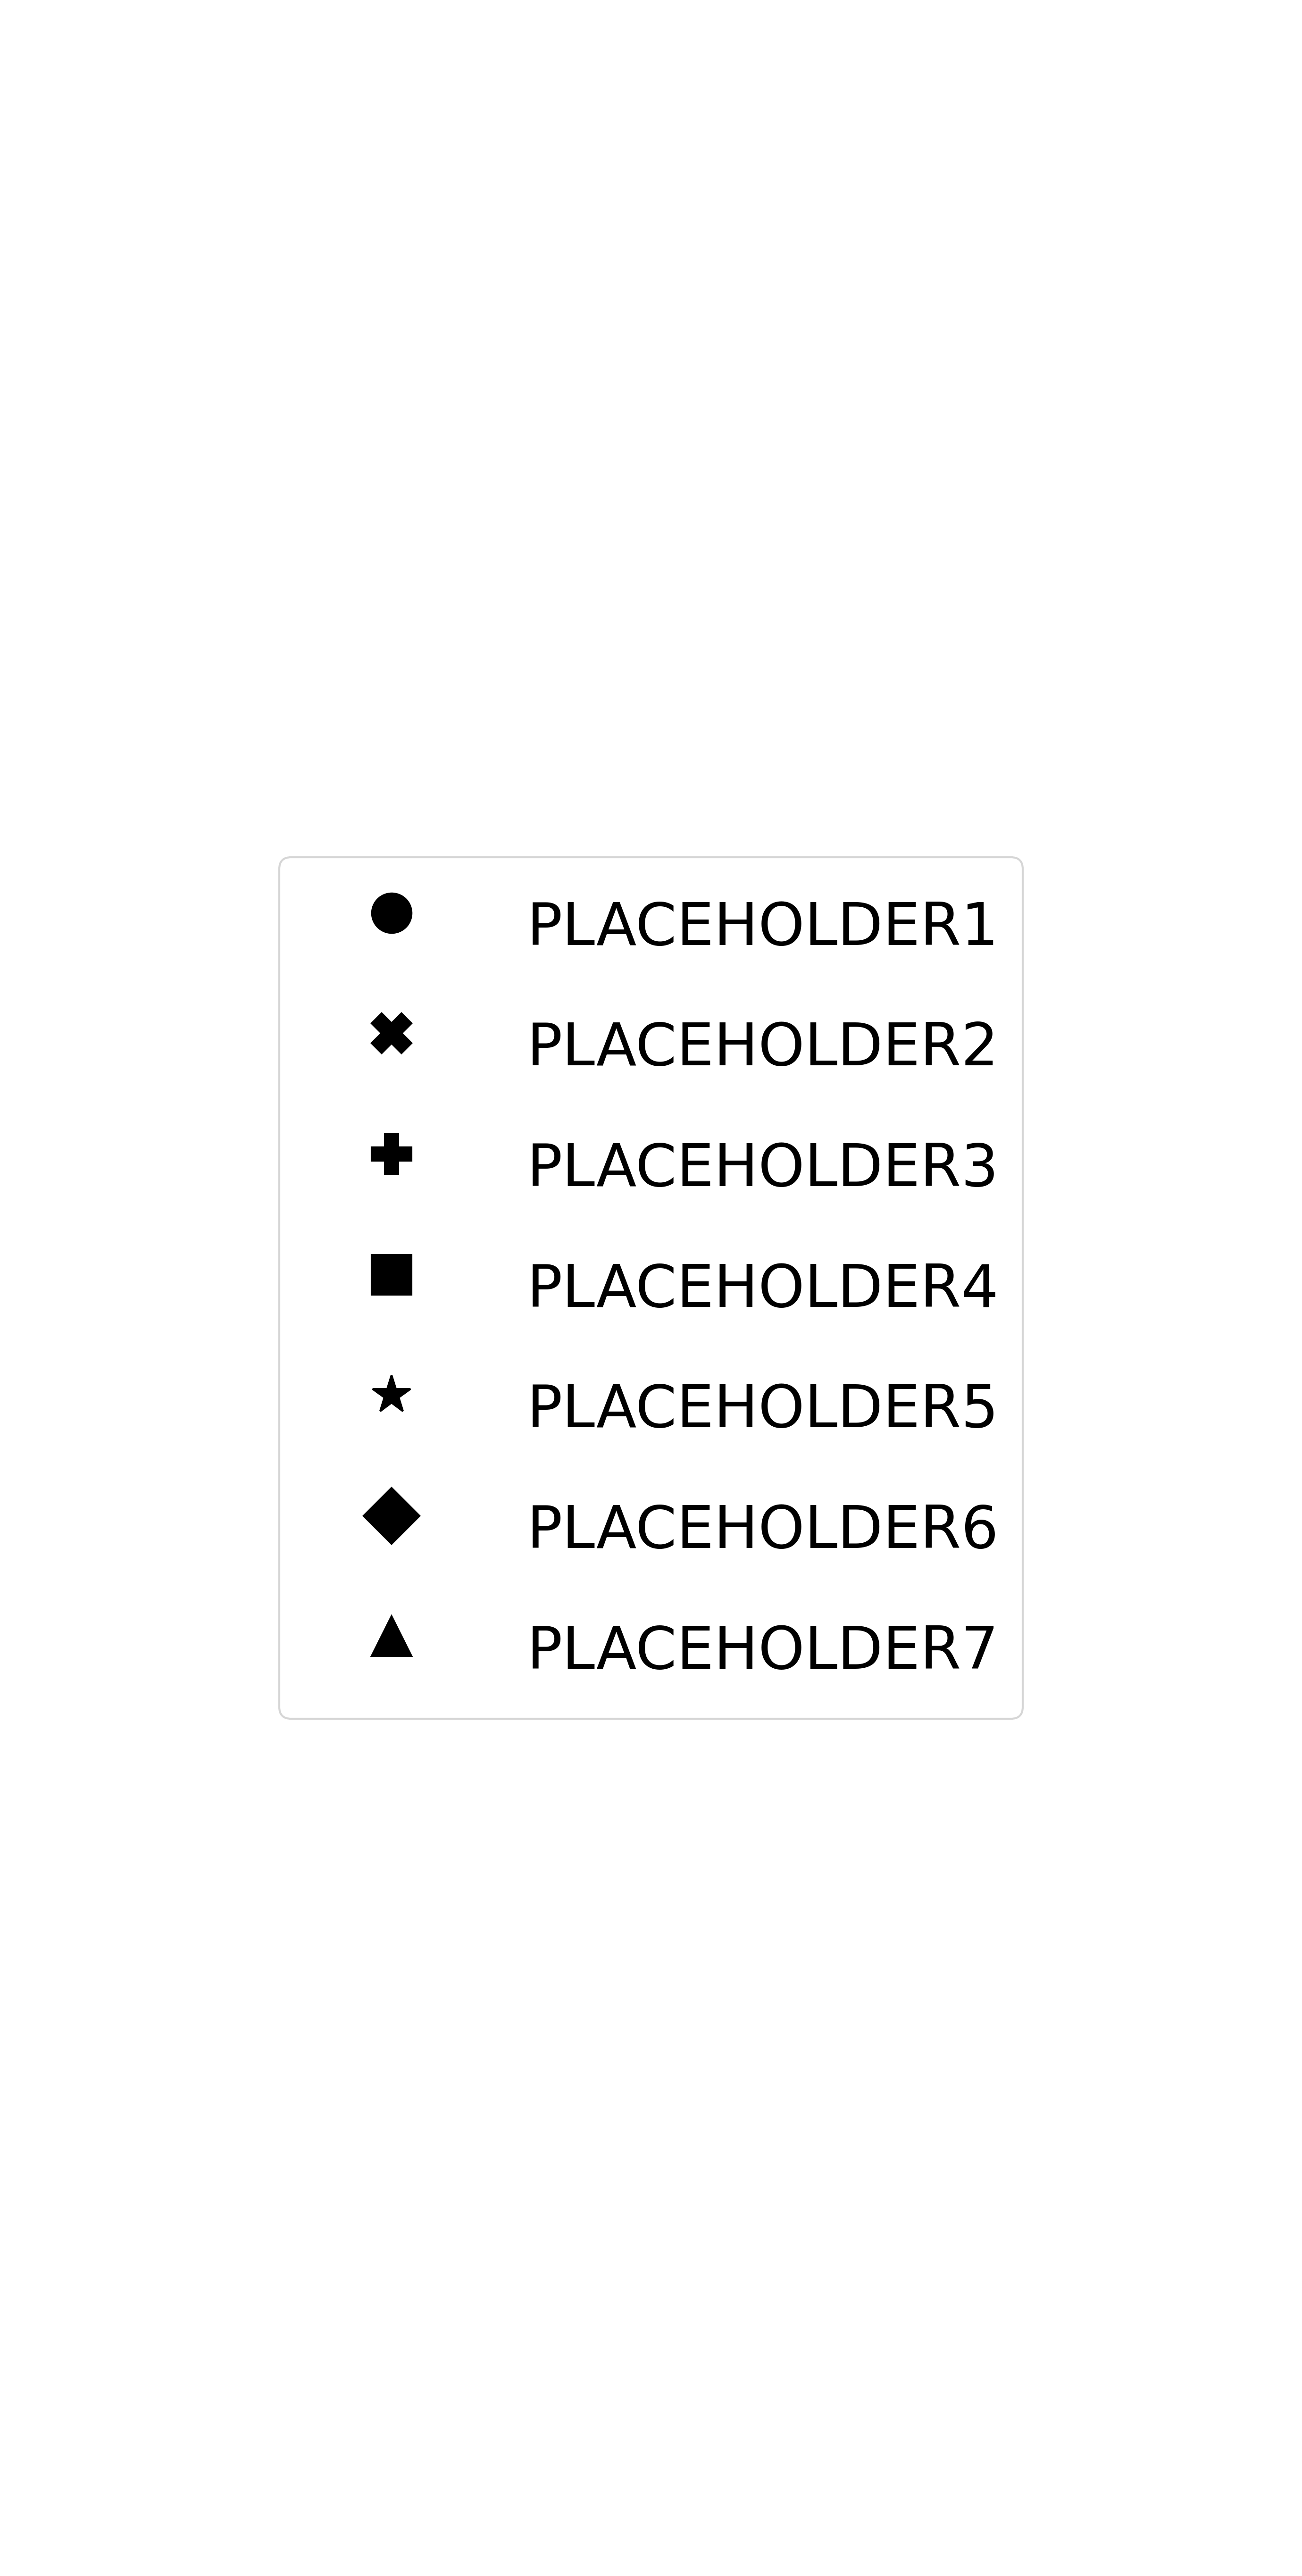

In [105]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D

# Define the markers and their corresponding labels
markers = {
    1: 'o',
    2: 'X',
    3: 'P',
    4: 's',
    5: '*',
    6: 'D',
    7: '^',
}

# Define the labels for the markers
legend_labels = ['PLACEHOLDER' + str(i) for i in markers]

# Create a list of legend handles
legend_handles = [mlines.Line2D([], [], color='black', marker=markers[key], linestyle='None', 
                                markersize=20, label=label) for key, label in zip(markers.keys(), legend_labels)]

# Create the legend figure
legend_fig = plt.figure(figsize=(20, 20), dpi=300)

# Add the legend to the figure
legend = legend_fig.legend(handles=legend_handles, fontsize=30, loc='center', handlelength=3, handleheight=2, handler_map={mlines.Line2D: HandlerLine2D(numpoints=1)})

# Hide the axes
plt.gca().set_axis_off()

# Adjust the layout
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.3, right=0.75)

plt.savefig('/Users/ryanyutian/Desktop/Manuscript/cap_output_analysis/legend_snv_draft.png', dpi=300, bbox_inches='tight')


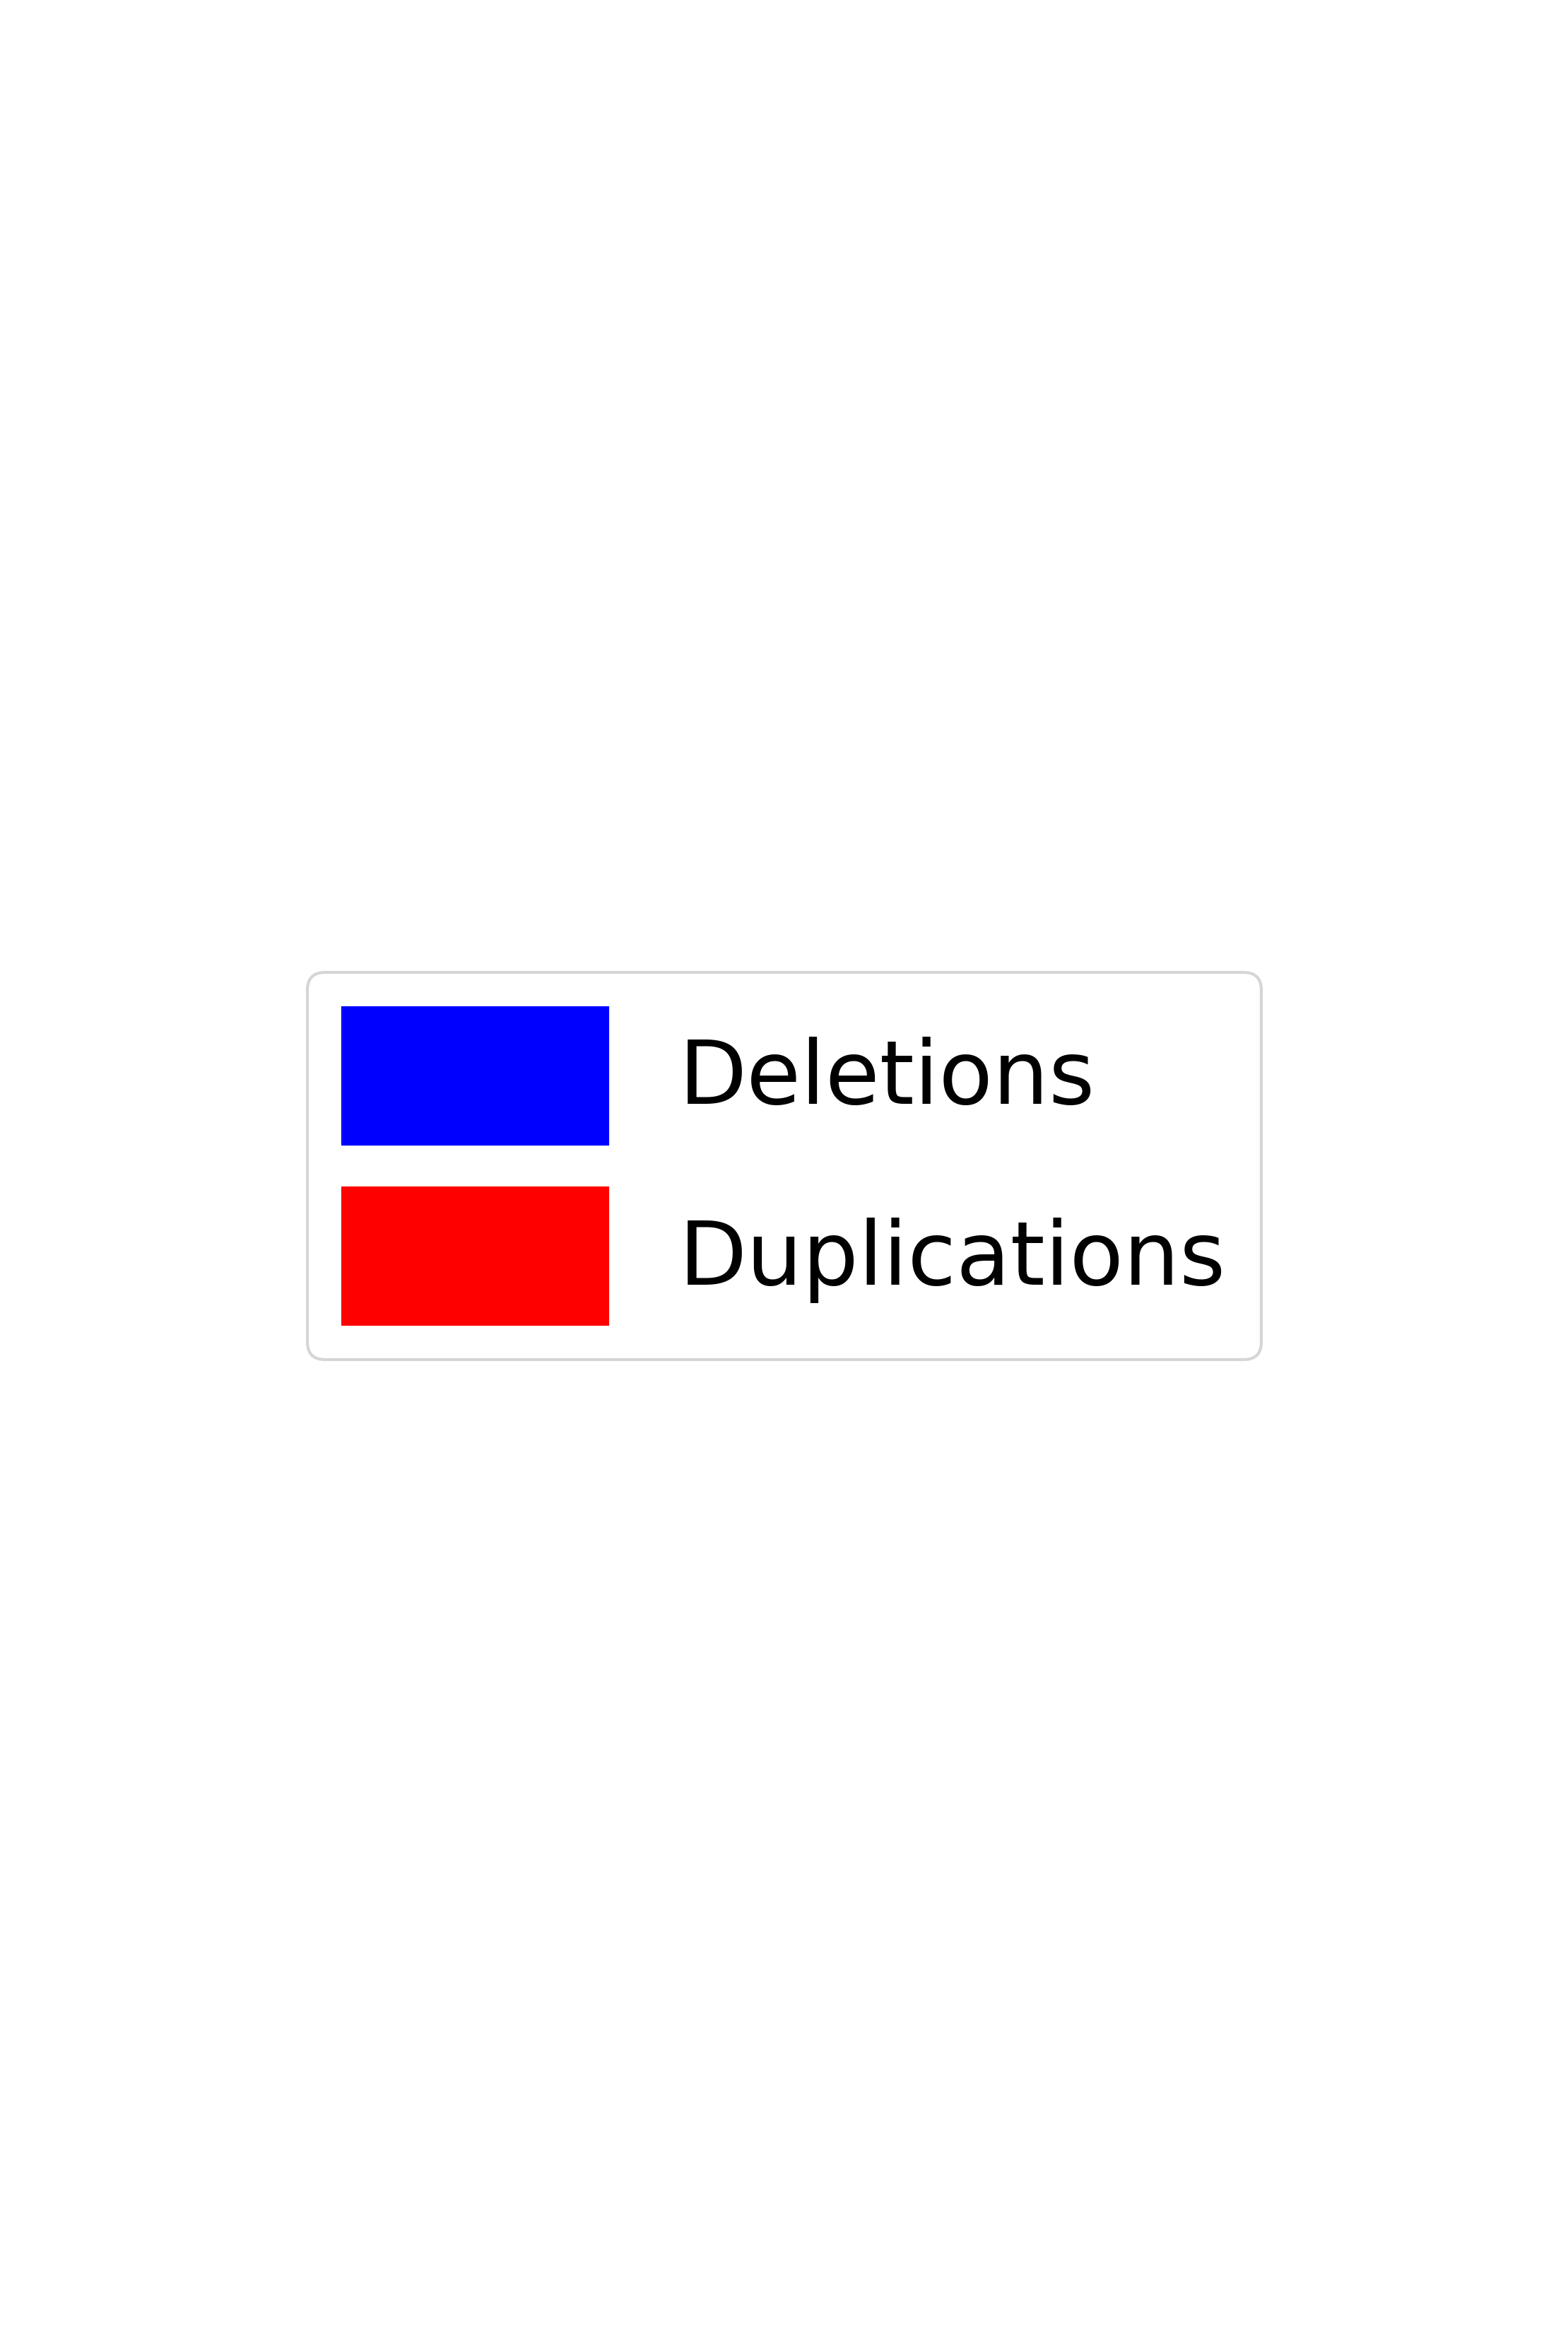

In [103]:
from matplotlib.patches import Patch

palette_colors = ['blue', 'red']
legend_labels = ['Deletions', 'Duplications']

legend_patches = [Patch(color=palette_colors[i], label=label) for i, label in enumerate(legend_labels)]

legend_fig = plt.figure(figsize=(16, 12), dpi=300)

legend_fig.legend(handles=legend_patches, fontsize=30, loc='center', handlelength=3, handleheight=2)

plt.gca().set_axis_off()

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.3, right=0.75)

plt.savefig('/Users/ryanyutian/Desktop/Manuscript/cap_output_analysis/legend_sv_draft.png', dpi=300, bbox_inches='tight')
